In [1]:
# https://www.nirfindia.org/nirfpdfcdn/2022/flipbook/index.html#p=34 offered an insight:
#   NIRF Rank is strongly correlated with "research performance".
# RP process issues can be distinguished broadly at https://www.oecd.org/sti/inno/Innovation-process-issues-OECDImpact.pdf.
# https://www.oecd.org/innovation/inno/41965313.pdf offers a pre-2010 historical perspective.
#
# This author compiled data from https://www.nirfindia.org/2022/EngineeringRanking.html, including its linked ones.
# Similarly, it was compiled for 2021 and 2020. To ease the manual compilation,
# about 10% of 200 ranked instituions was considered.
# Institutions ranked in top 20 in any of those 3 years were included, except for "IR-E-U-0184"
# whose Rank 41 in 2021 would have called for including 20 more which were ranked better ...
# https://www.nirfindia.org/nirfpdfcdn/2022/framework/Engineering.pdf has a
# Summary of Ranking Parameters and Weightages.
#
# "IR-E-U-0701" could be an example institution of interest.
fileIn <- file.path("C://Users/SONY/Desktop/alumniMentorship", "inNIRFd.csv"); fileIn
date()

[1] "C://Users/SONY/Desktop/alumniMentorship/inNIRFd.csv"

[1] "Fri Aug 26 14:53:30 2022"

In [2]:
datNIRF.bak <- read.csv(file=fileIn)
datNIRF.bak$institution <- as.factor(datNIRF.bak$institution)
datNIRF.bak$year <- as.factor(datNIRF.bak$year)
datNIRF.bak$year <- relevel(datNIRF.bak$year, ref="2021") # considering (a) a dip in SRCrevenue in year2021
  # and (b) a possible dropping of year2020 data coz it does not have "faculty" (and "SRCrevPerFaculty") data.
datNIRF.bak$category <- as.factor(datNIRF.bak$category)
UGPGPhD <- datNIRF.bak$UGactualStudents + datNIRF.bak$PGactualStudents + datNIRF.bak$PhDpursuing
propPGPhD <- (datNIRF.bak$PGactualStudents + datNIRF.bak$PhDpursuing) / UGPGPhD
propPhD <- datNIRF.bak$PhDpursuing / UGPGPhD
FROcost <- datNIRF.bak$FROsalaries + datNIRF.bak$FROmtce + datNIRF.bak$FROseminars
SRCrevenue <- datNIRF.bak$SRamount + datNIRF.bak$Camount
SRCrevPerFaculty <- SRCrevenue / datNIRF.bak$faculty # surrogate per faculty measure.
  # [RF is average annual research funding earnings (amount actually received in rupees) per
  # faculty at institute level in previous three years]
  # says https://www.nirfindia.org/nirfpdfcdn/2022/framework/Engineering.pdf
datNIRF.bak <- cbind(datNIRF.bak, UGPGPhD=UGPGPhD, propPGPhD=propPGPhD, propPhD=propPhD,
                     FROcost=FROcost, SRCrevenue=SRCrevenue, SRCrevPerFaculty=SRCrevPerFaculty,
                     pScore=datNIRF.bak$Score / 100) # coz [0,1] success "probability" is expected for
                       # Binomial Logistic Regression and other modeling.
str(datNIRF.bak)

'data.frame':	66 obs. of  30 variables:
 $ institution     : Factor w/ 22 levels "IR-E-I-1074",..: 16 16 16 1 1 1 10 10 10 2 ...
 $ year            : Factor w/ 3 levels "2021","2020",..: 3 1 2 3 1 2 3 1 2 3 ...
 $ UGactualStudents: int  4377 3935 4120 4405 3988 3793 4554 4179 4015 3642 ...
 $ PGactualStudents: int  1895 1914 1783 2619 2177 1955 2063 1738 1936 1856 ...
 $ PhDpursuing     : int  2204 2151 2142 3332 2919 2615 2411 2187 2200 1965 ...
 $ FROsalaries     : num  551 560 476 340 343 ...
 $ FROmtce         : num  459 399 328 364 320 ...
 $ FROseminars     : num  11.05 17.19 27.46 0.53 1.3 ...
 $ SRprojects      : int  777 605 575 581 624 567 521 622 563 879 ...
 $ SRagencies      : int  91 97 64 205 195 140 170 185 149 150 ...
 $ SRamount        : num  401 390 521 261 228 ...
 $ Cprojects       : int  866 943 867 355 362 387 532 720 733 375 ...
 $ Corgs           : int  572 526 413 299 318 327 388 484 528 126 ...
 $ Camount         : num  176.2 171.5 136.8 37.7 31 ...
 $ facult

In [3]:
datNIRF <- datNIRF.bak
  # Was till 2022Aug23: datNIRF.bak[datNIRF.bak$year == 2022,] # consider only latest (year 2022) data for now.
str(datNIRF)

'data.frame':	66 obs. of  30 variables:
 $ institution     : Factor w/ 22 levels "IR-E-I-1074",..: 16 16 16 1 1 1 10 10 10 2 ...
 $ year            : Factor w/ 3 levels "2021","2020",..: 3 1 2 3 1 2 3 1 2 3 ...
 $ UGactualStudents: int  4377 3935 4120 4405 3988 3793 4554 4179 4015 3642 ...
 $ PGactualStudents: int  1895 1914 1783 2619 2177 1955 2063 1738 1936 1856 ...
 $ PhDpursuing     : int  2204 2151 2142 3332 2919 2615 2411 2187 2200 1965 ...
 $ FROsalaries     : num  551 560 476 340 343 ...
 $ FROmtce         : num  459 399 328 364 320 ...
 $ FROseminars     : num  11.05 17.19 27.46 0.53 1.3 ...
 $ SRprojects      : int  777 605 575 581 624 567 521 622 563 879 ...
 $ SRagencies      : int  91 97 64 205 195 140 170 185 149 150 ...
 $ SRamount        : num  401 390 521 261 228 ...
 $ Cprojects       : int  866 943 867 355 362 387 532 720 733 375 ...
 $ Corgs           : int  572 526 413 299 318 327 388 484 528 126 ...
 $ Camount         : num  176.2 171.5 136.8 37.7 31 ...
 $ facult

In [4]:
areAllEq <- all.equal(datNIRF$FROcost, datNIRF$FROsalaries + datNIRF$FROmtce + datNIRF$FROseminars) # test if nearly equal.
stopifnot(areAllEq)
areAllEq <- all.equal(datNIRF$SRCrevenue, datNIRF$SRamount + datNIRF$Camount)
stopifnot(areAllEq)

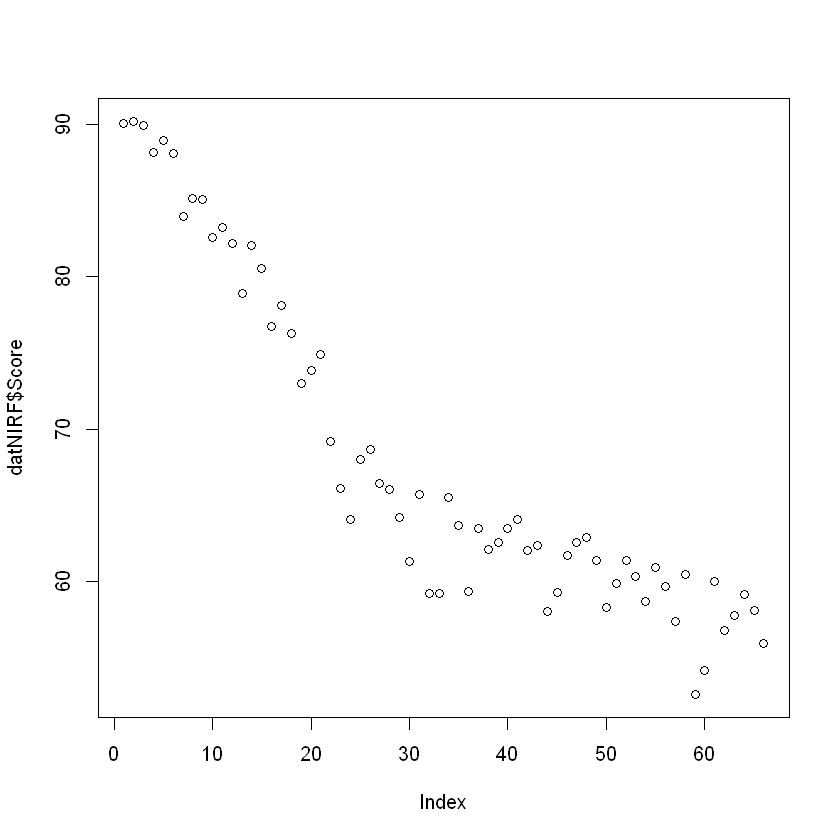

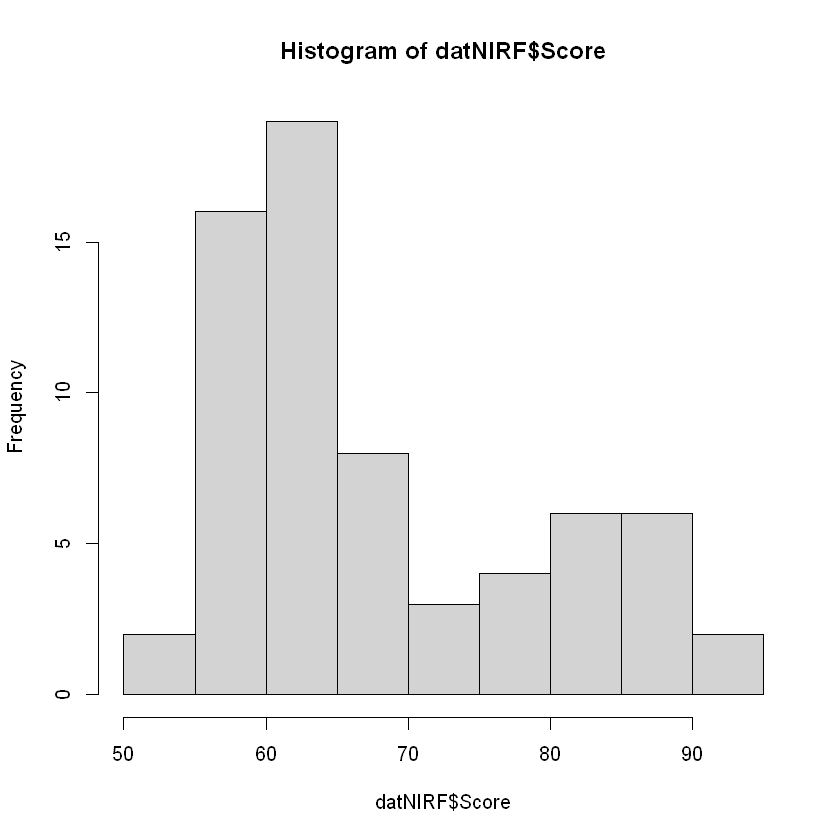

In [5]:
plot(datNIRF$Score) # Score is what shows up as a sequence of ranks
hist(datNIRF$Score)

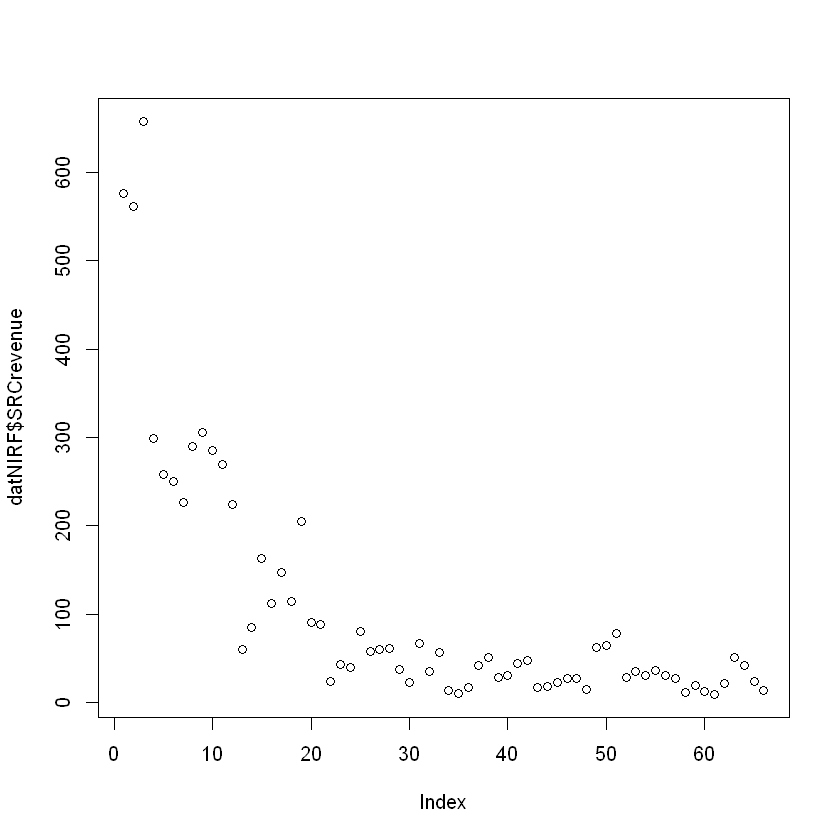

In [6]:
# Score seems to have a bi-modal distribution, with a possible break <= 75.
plot(datNIRF$SRCrevenue)

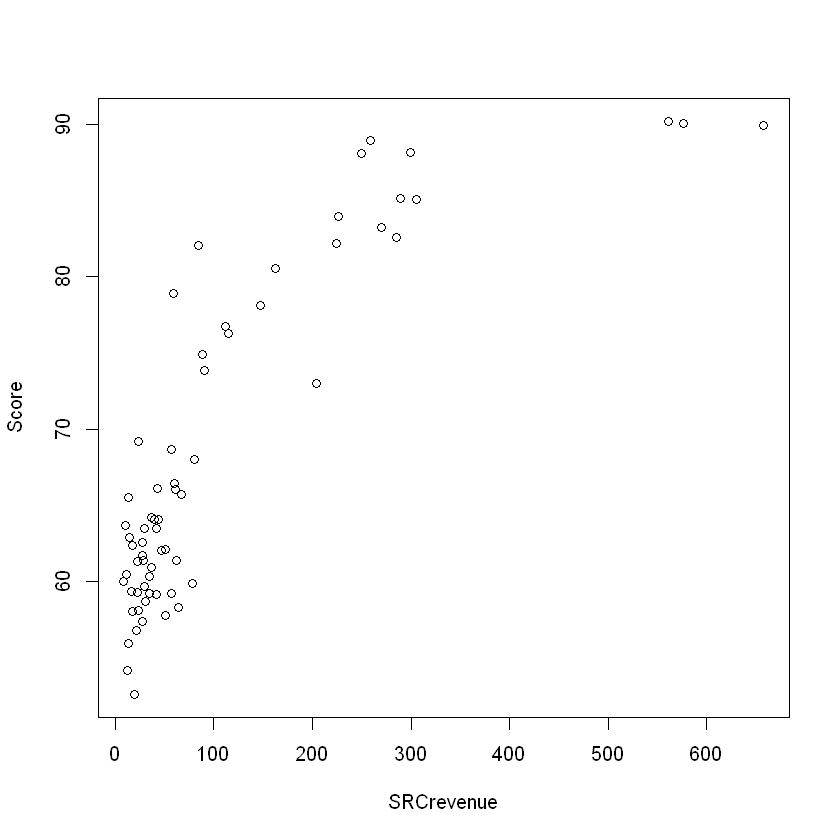

In [7]:
plot(Score ~ SRCrevenue, data=datNIRF)

In [8]:
# From the above plots, it looks like SRCrevenue (Sponsored Research + Consultancy projects)
# itself can explain (NIRF) Score quite well. It reminds of a classical "saturation curve".
# Couple of points to the upper left of that curve are worth investigating: they have managed
# high (near 80) Score with < Rs 100cr SRCrevenue; refer (a) IR-E-U-0573, (b) IR-E-U-0467 and IR-E-U-0013,
# (c) IR-E-U-0237, IR-E-U-0575, and IR-E-U-0490.  IR-E-U-0053 is on the other (right) side of the curve at
# (200, 73) and might raise Score next year.

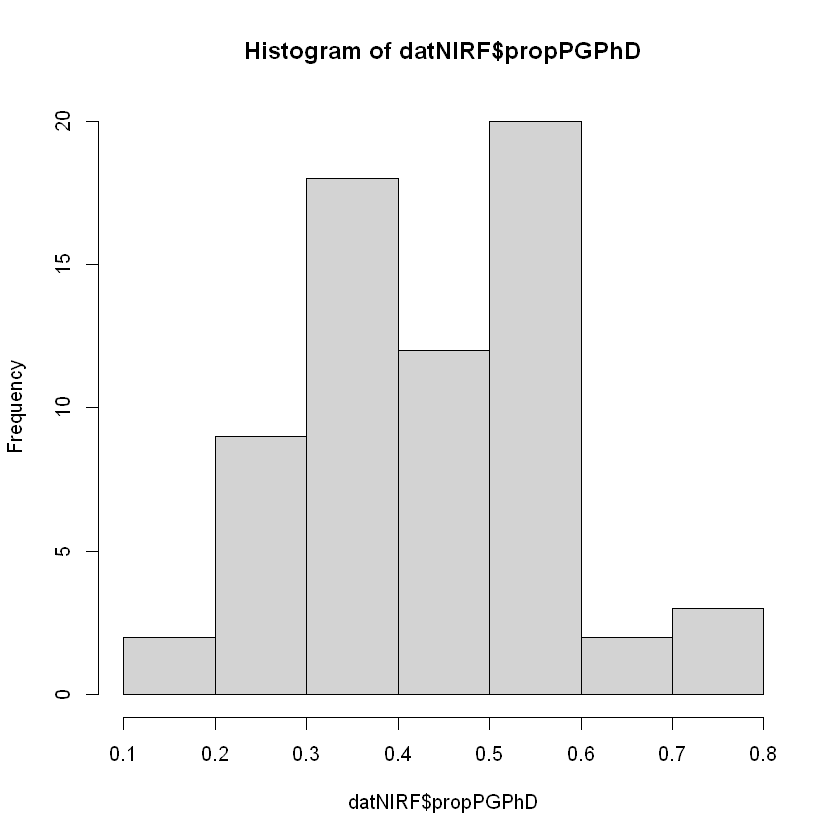

In [9]:
hist(datNIRF$propPGPhD)

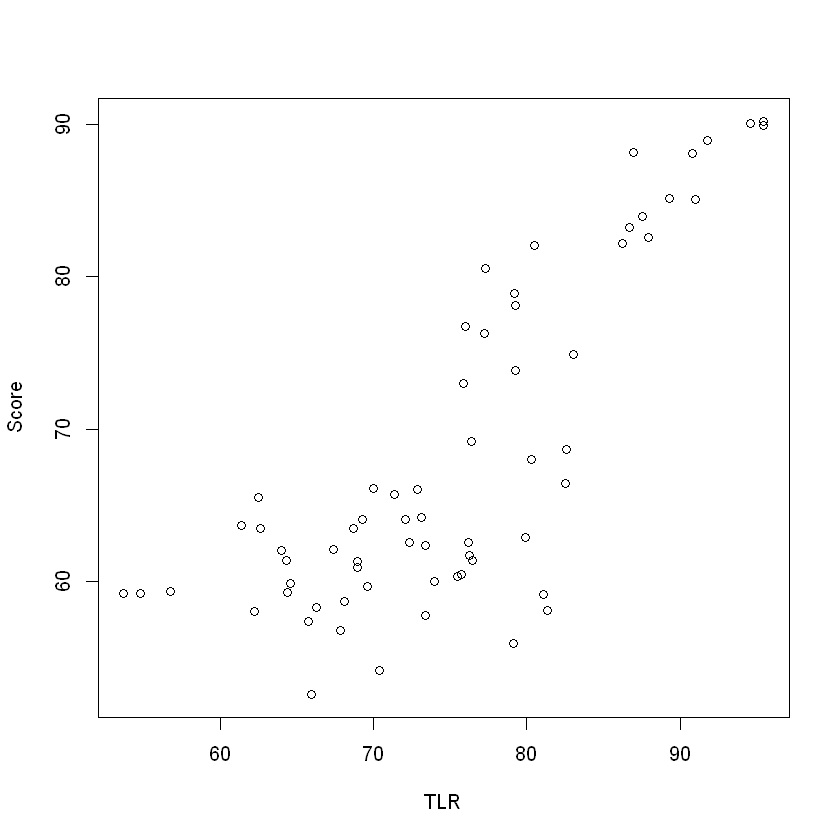

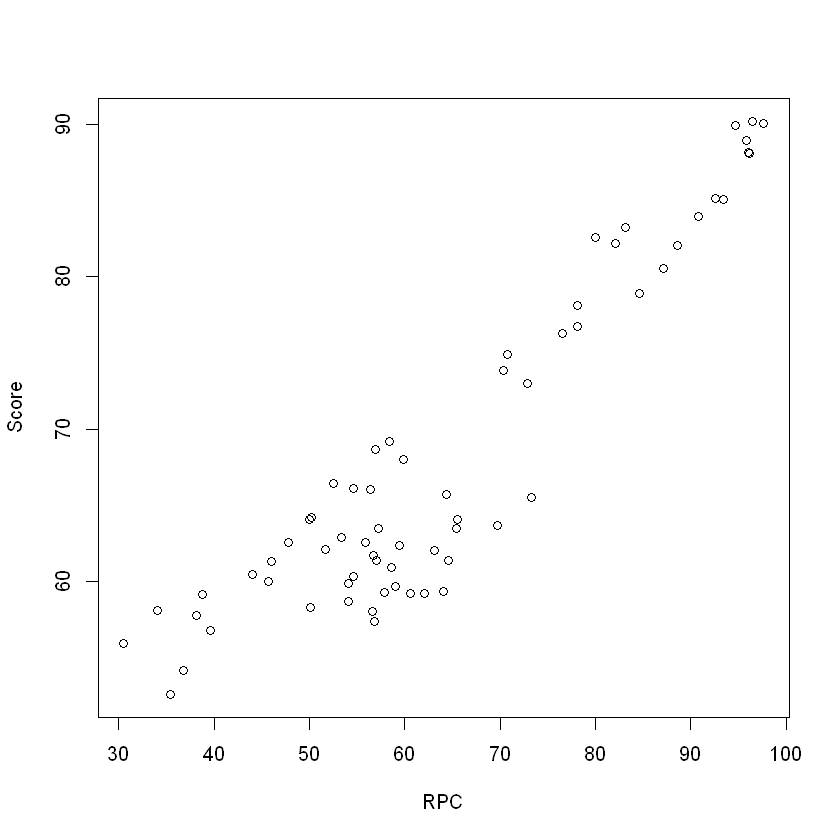

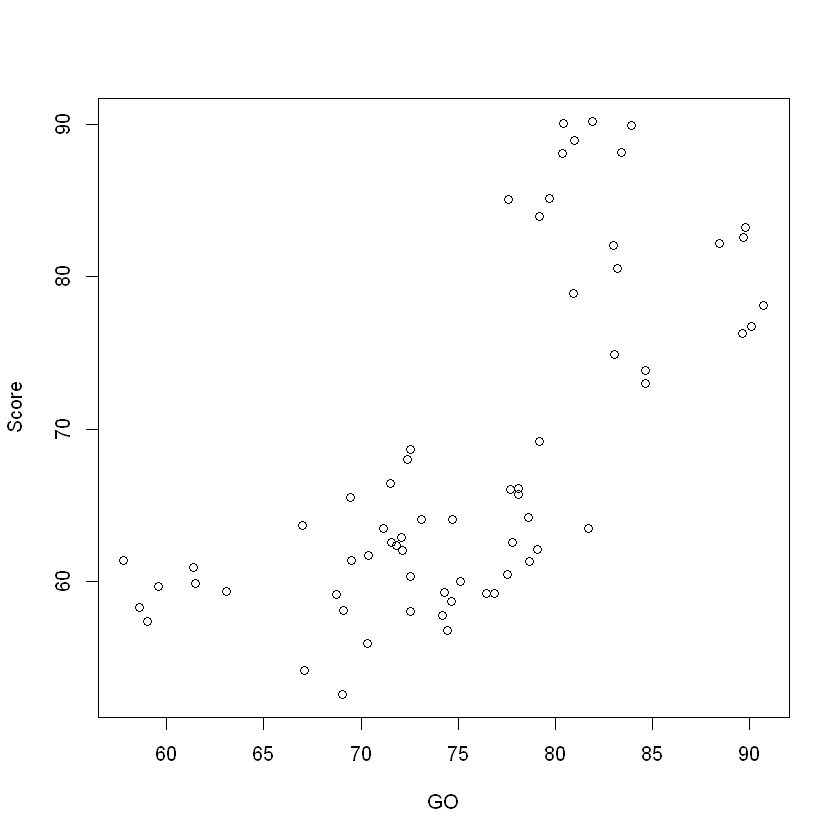

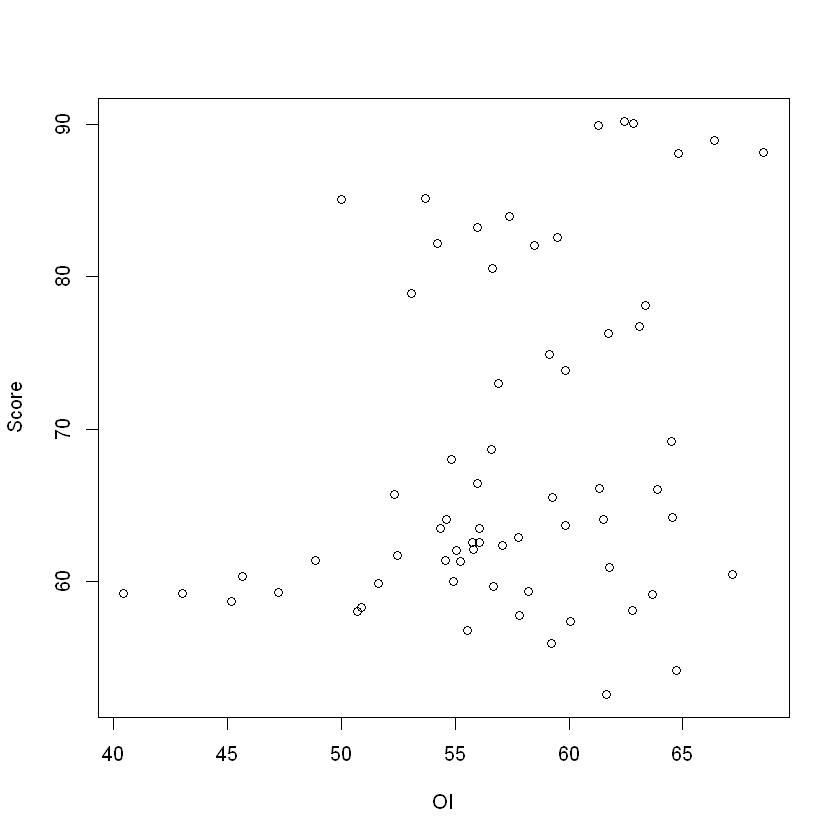

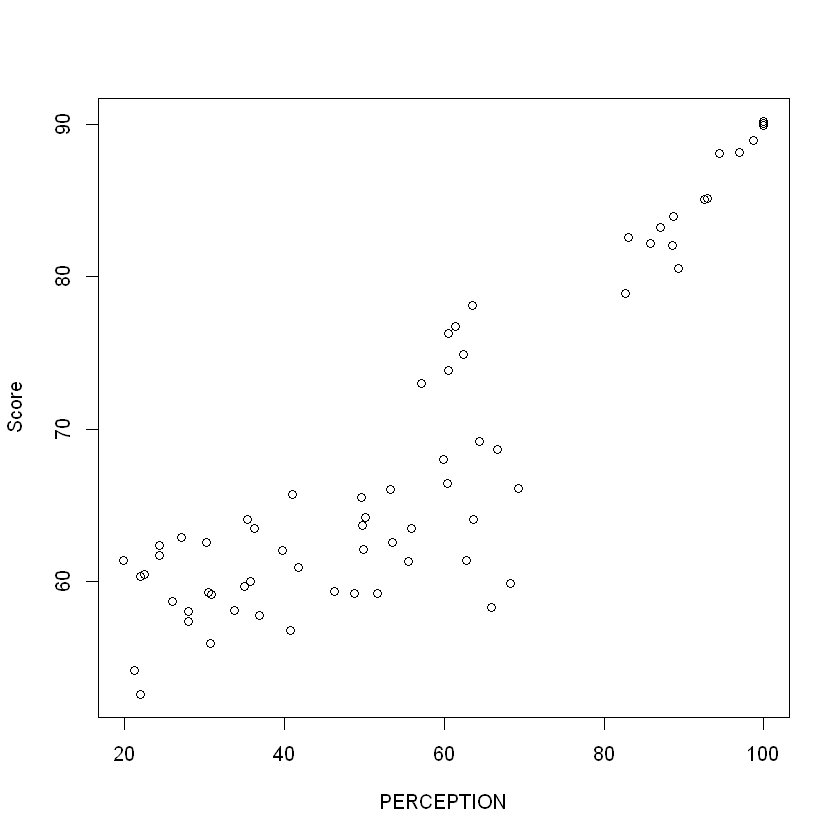

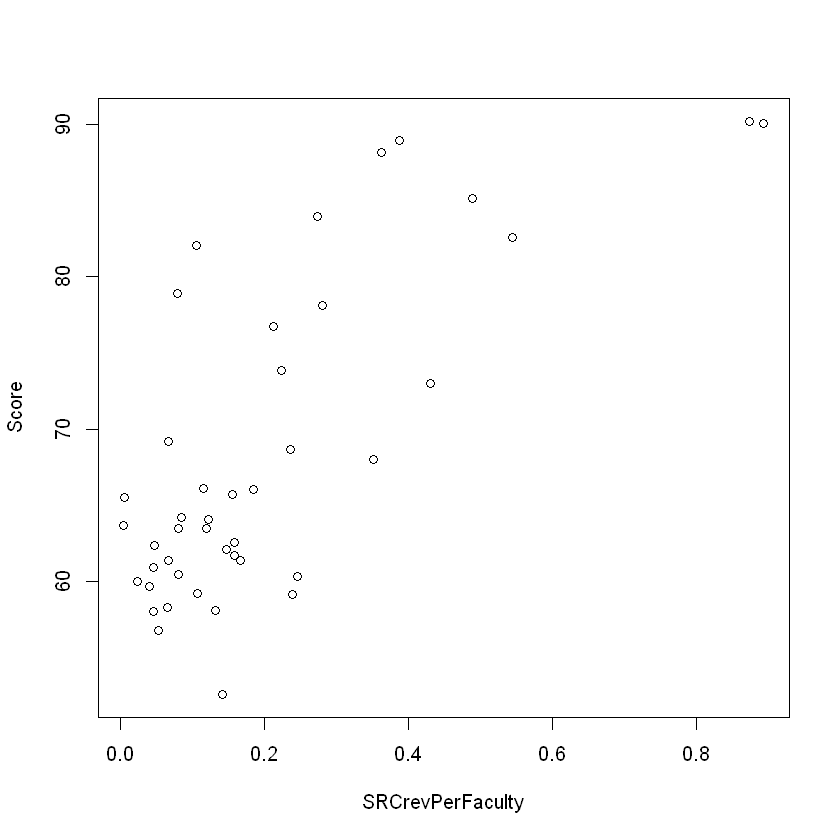

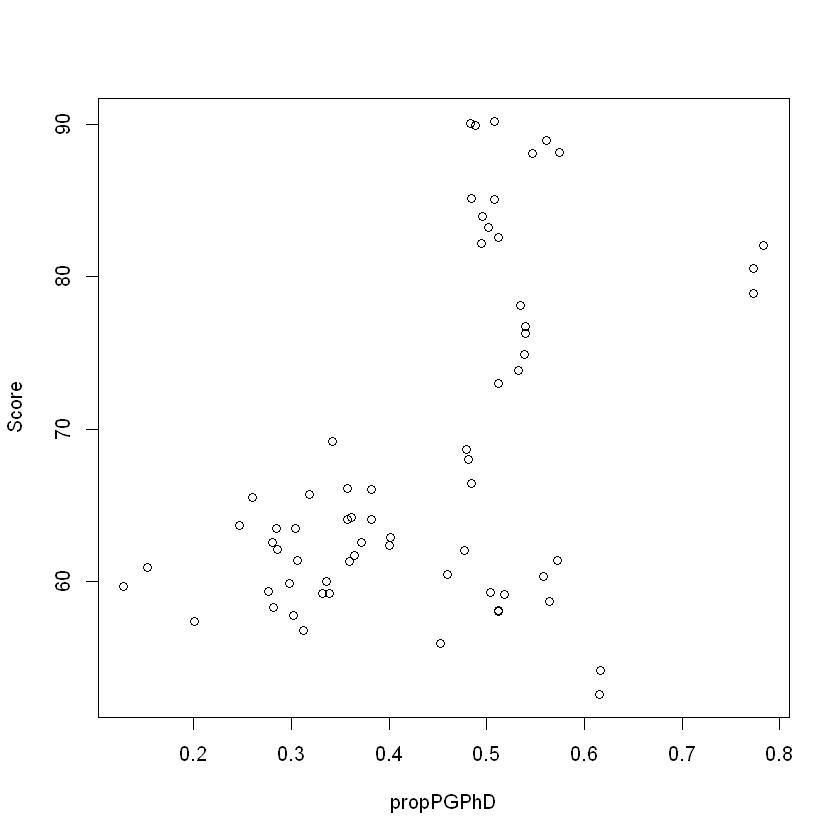

In [10]:
plot(Score ~ TLR+RPC+GO+OI+PERCEPTION +SRCrevPerFaculty +propPGPhD, data=datNIRF)

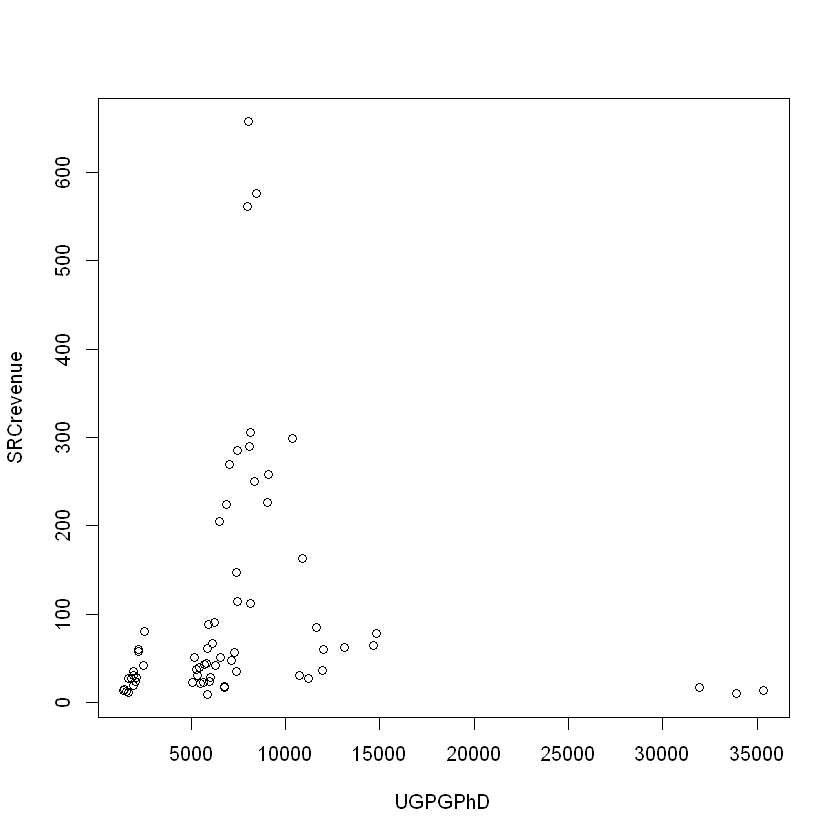

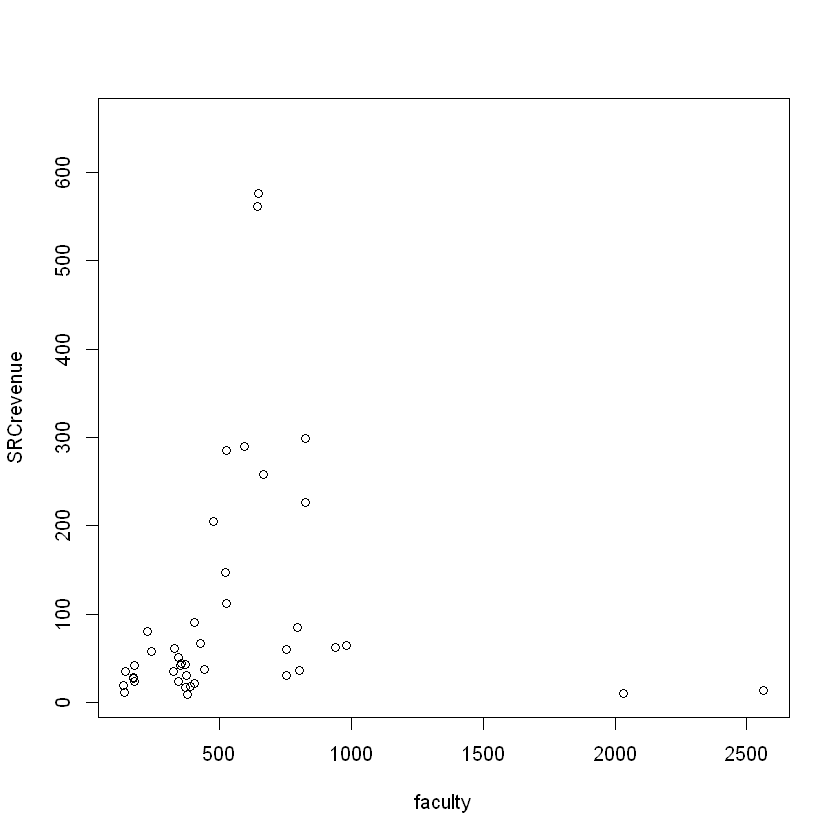

In [11]:
plot(SRCrevenue ~ UGPGPhD + faculty, data=datNIRF)

In [12]:
# Looks like SRCrevenue > Rs. 75cr is associated with "faculty" > 500.

In [13]:
mytable <- (tapply(datNIRF$SRCrevenue, datNIRF$year, summary)); mytable

$`2021`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.88   27.82   43.06  100.66   88.62  561.19 

$`2020`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.66   23.55   48.88  105.59  107.82  658.17 

$`2022`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.77   27.59   50.67  105.11  103.76  576.95 


In [14]:
# as per year-wise summaries: min and max reduced after 2020, but median and mean bounced back.
# maybe pandemic-related effect.

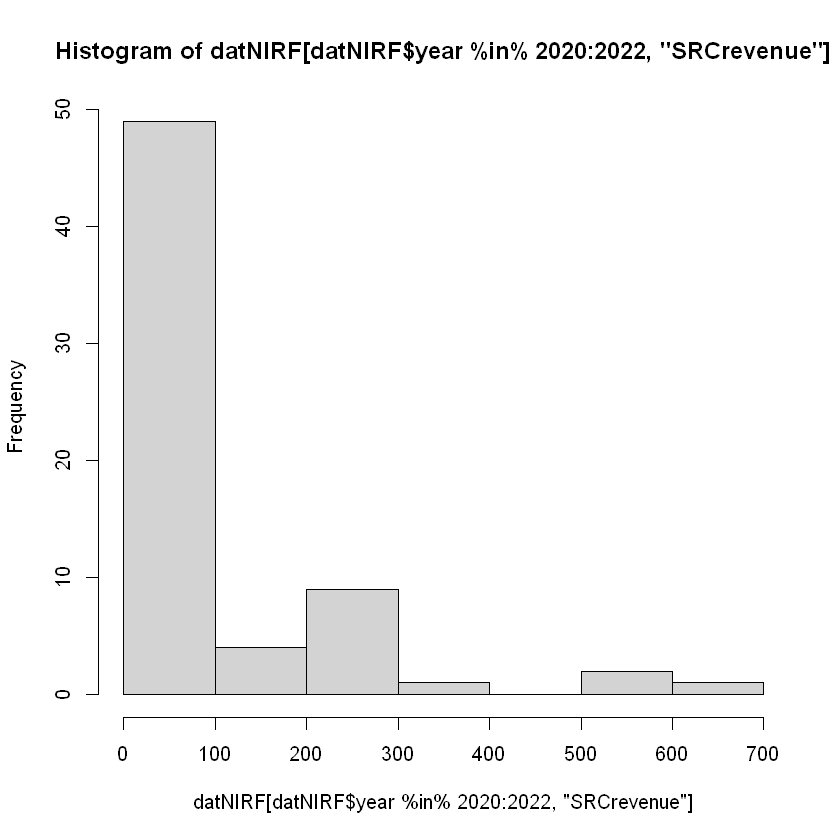

In [15]:
hist(datNIRF[datNIRF$year %in% 2020:2022, "SRCrevenue"])

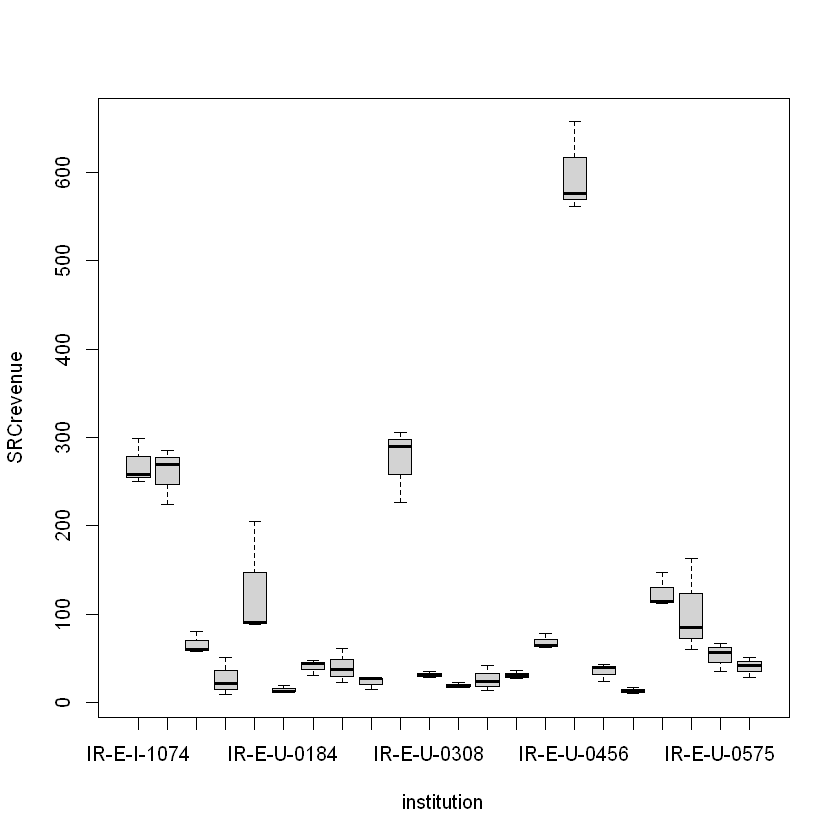

In [16]:
boxplot(SRCrevenue ~ institution, data=datNIRF) # beware: just 3 points in each box!

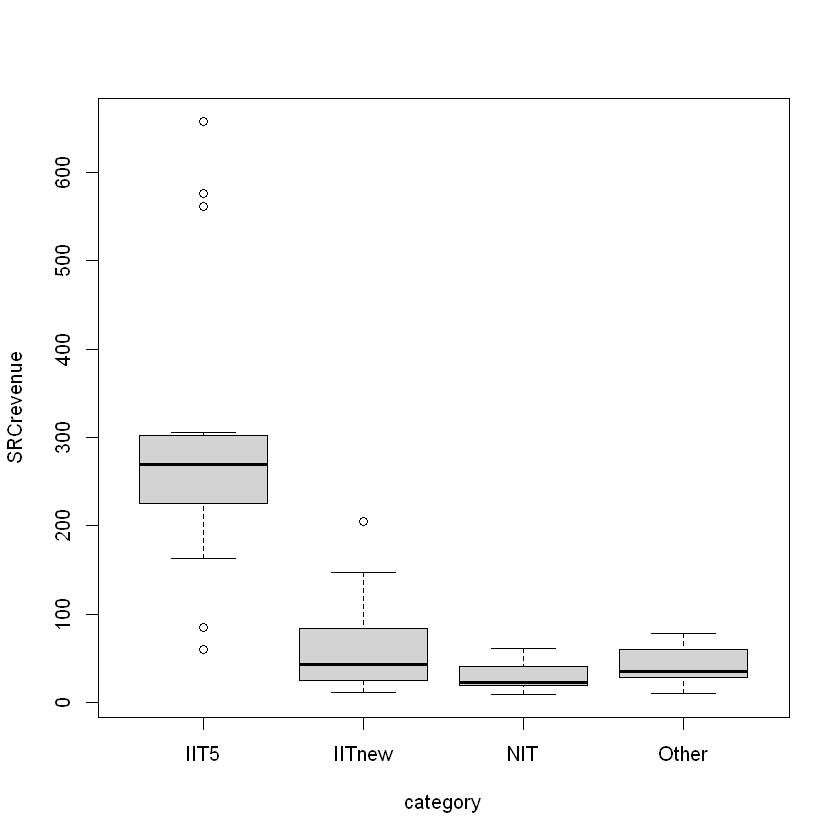

In [17]:
boxplot(SRCrevenue ~ category, data=datNIRF)

In [18]:
# Option #1:
# As per NIRF, Rank {1:N} is on sorted (descending) order of Score, where Score = wtSum(TLR+RPC+GO+OI+PERCEPTION).
# Suppose a result success is a Score >= Score.target eg Score.target 75 considering associated Rank <= 5.
# Past Score and component indicators (eg TLR or RPC) for each institution, but they do not seem controllable
# for future success ie they cannot be directly worked for.
# Ignoring institution+year+ the following seem to be controllable variables:
# UGactualStudents+PGactualStudents+FROsalaries+FROmtce+FROseminars+SRprojects+SRagencies+SRamount
# +Cprojects+Corgs+Camount+faculty
# +UGPGPhD+propPGPhD+FROcost+SRCrevenue+SRCrevPerFaculty
#
# Option #2:
# Consider SRCrevenue as the dependent (response) variable. Operationally, this is important for institutions,
# just as for any body corporate. It also impacts sustainability. Staying alive :-).

cOptionModel <- c(1, 2)[1] # choose which option.
dat <- cbind(datNIRF, ScoreSuccess=(datNIRF$Score >= 75))
# dat$year <- as.factor(dat$year) # coz (impact of) dip in between could be missed if "year" is treated ordinally.
# dat$institution <- as.factor(dat$institution) # coz "institution" is repeated in data across years.

In [19]:
summary(dat)

      institution   year    UGactualStudents PGactualStudents  PhDpursuing    
 IR-E-I-1074: 3   2021:22   Min.   :  615    Min.   : 124.0   Min.   : 279.0  
 IR-E-I-1075: 3   2020:22   1st Qu.: 2573    1st Qu.: 773.5   1st Qu.: 650.8  
 IR-E-U-0013: 3   2022:22   Median : 3656    Median :1298.0   Median :1161.0  
 IR-E-U-0025: 3             Mean   : 4615    Mean   :1724.5   Mean   :1380.3  
 IR-E-U-0053: 3             3rd Qu.: 4300    3rd Qu.:1933.5   3rd Qu.:2106.0  
 IR-E-U-0184: 3             Max.   :26185    Max.   :6870.0   Max.   :3332.0  
 (Other)    :48                                                               
  FROsalaries        FROmtce        FROseminars       SRprojects   
 Min.   : 36.85   Min.   : 17.65   Min.   : 0.020   Min.   : 24.0  
 1st Qu.: 84.34   1st Qu.: 63.37   1st Qu.: 0.800   1st Qu.:109.0  
 Median :121.05   Median : 88.27   Median : 1.910   Median :160.0  
 Mean   :170.76   Mean   :139.08   Mean   : 3.268   Mean   :248.2  
 3rd Qu.:244.39   3rd Qu.:13

In [20]:
varNames <- setdiff(colnames(dat), c("institution", "Score")) # "Rank"
warning("faculty counts are unavailable in 2020 data. Including that variable loses that year's data.")
varNames.resp <- c("pScore", "SRCrevenue")[cOptionModel]
varNames.explan <- setdiff(varNames, c(varNames.resp,
                                       c(""), # c("faculty", "SRCrevPerFaculty"), # optionally to retain year2020 data.
                                       switch(cOptionModel,
                                              { # 1 ie "pScore". So drop those those that directly use it or sum to it.
                                                  c("Rank", "ScoreSuccess", c("TLR", "RPC", "GO", "OI", "PERCEPTION"))
                                              },
                                              { # 2 ie "SRCrevenue". So drop those that sum to it or its ratio.
                                                  c("SRamount", "Camount", "SRCrevPerFaculty")
                                              })
                                      ))
fmla1b <- fmla1 <- as.formula(paste(varNames.resp, "~", paste(varNames.explan, collapse="+"))); fmla1

Warning message in eval(expr, envir, enclos):
"faculty counts are unavailable in 2020 data. Including that variable loses that year's data."


pScore ~ year + UGactualStudents + PGactualStudents + PhDpursuing + 
    FROsalaries + FROmtce + FROseminars + SRprojects + SRagencies + 
    SRamount + Cprojects + Corgs + Camount + faculty + category + 
    UGPGPhD + propPGPhD + propPhD + FROcost + SRCrevenue + SRCrevPerFaculty

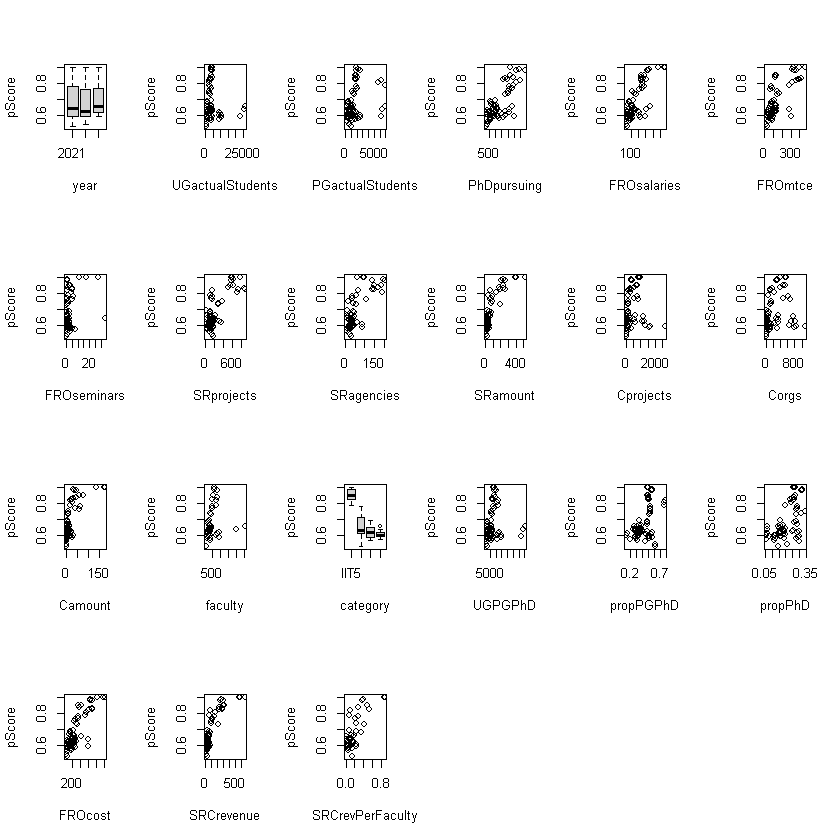

In [21]:
    tmp.ncol <- 6; par(mfrow=c(ceiling(length(varNames.explan) / tmp.ncol), tmp.ncol))
      plot(fmla1, data=dat, main="")

In [22]:
mustInstall <- FALSE; if(mustInstall){
    install.packages(c("pscl", "lmtest", "sandwich"))
}
require(pscl) # for odTest()
require(lmtest) # for coeftest()
require(sandwich) # for sandwich()
source("C://Users/SONY/Downloads/worldClass/src-modelDifficultyHelp1.R")
cDecimalDigits <- 3

Loading required package: pscl

Warning message:
"package 'pscl' was built under R version 4.2.1"
Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis

Loading required package: lmtest

Warning message:
"package 'lmtest' was built under R version 4.2.1"
Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: sandwich

Warning message:
"package 'sandwich' was built under R version 4.2.1"



Call:
glm(formula = fmla1, data = dat)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.059557  -0.012109   0.001587   0.012946   0.048870  

Coefficients: (3 not defined because of singularities)
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       6.469e-01  7.703e-02   8.398 2.61e-08 ***
year2022          7.086e-03  1.274e-02   0.556   0.5836    
UGactualStudents -9.110e-06  7.838e-06  -1.162   0.2576    
PGactualStudents  1.425e-05  2.092e-05   0.681   0.5028    
PhDpursuing       3.913e-05  3.756e-05   1.042   0.3088    
FROsalaries       1.365e-04  3.084e-04   0.443   0.6624    
FROmtce           8.930e-05  1.610e-04   0.555   0.5847    
FROseminars      -1.495e-03  4.945e-03  -0.302   0.7652    
SRprojects       -1.125e-04  7.502e-05  -1.499   0.1480    
SRagencies        5.215e-04  4.613e-04   1.130   0.2705    
SRamount         -3.648e-04  4.843e-04  -0.753   0.4593    
Cprojects        -1.268e-04  6.311e-05  -2.009   0

[1] "Inference with this robust sandwich covar-matrix estimator while using Poisson means (and underestimated var)."

z test of coefficients:

                    Estimate  Std. Error z value  Pr(>|z|)    
(Intercept)       6.4693e-01  5.4684e-02 11.8304 < 2.2e-16 ***
year2022          7.0863e-03  7.3535e-03  0.9637  0.335215    
UGactualStudents -9.1098e-06  5.5055e-06 -1.6547  0.097992 .  
PGactualStudents  1.4254e-05  1.5446e-05  0.9228  0.356100    
PhDpursuing       3.9126e-05  2.9047e-05  1.3470  0.177978    
FROsalaries       1.3649e-04  2.1695e-04  0.6291  0.529258    
FROmtce           8.9298e-05  9.9140e-05  0.9007  0.367733    
FROseminars      -1.4952e-03  2.9028e-03 -0.5151  0.606493    
SRprojects       -1.1249e-04  5.9059e-05 -1.9046  0.056828 .  
SRagencies        5.2146e-04  4.0927e-04  1.2741  0.202619    
SRamount         -3.6481e-04  2.9965e-04 -1.2174  0.223436    
Cprojects        -1.2678e-04  3.1589e-05 -4.0133 5.988e-05 ***
Corgs             1.9670e-04  6.0761e-

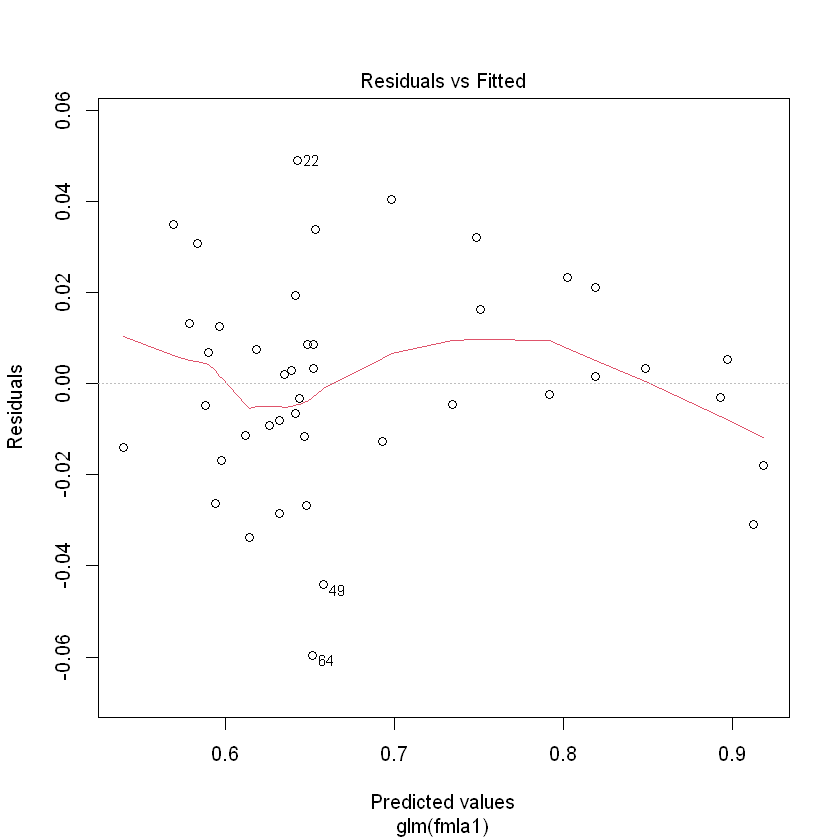

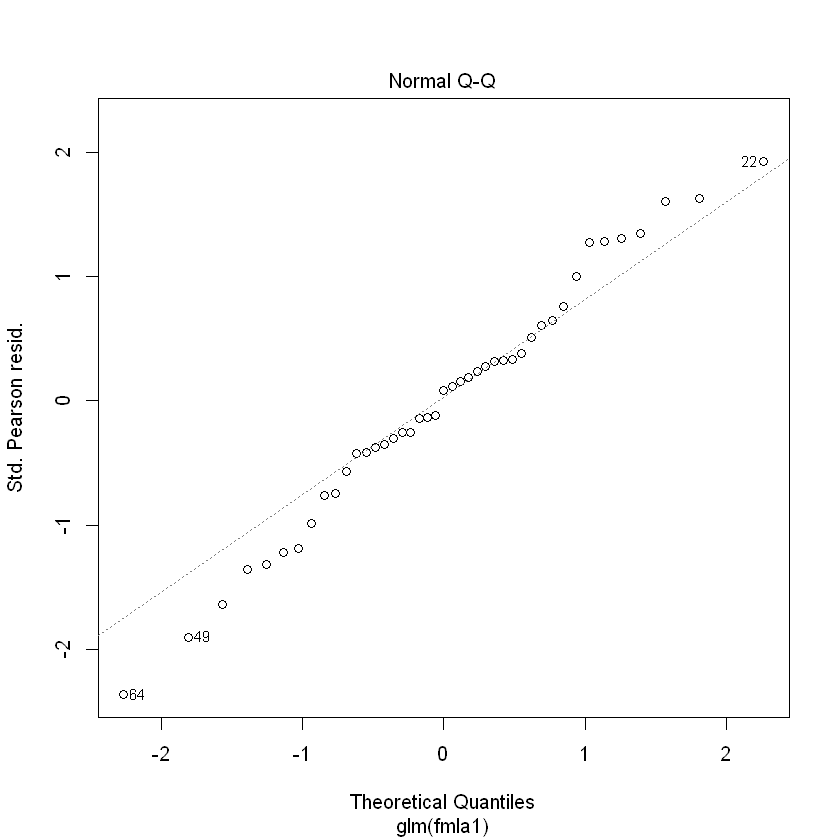

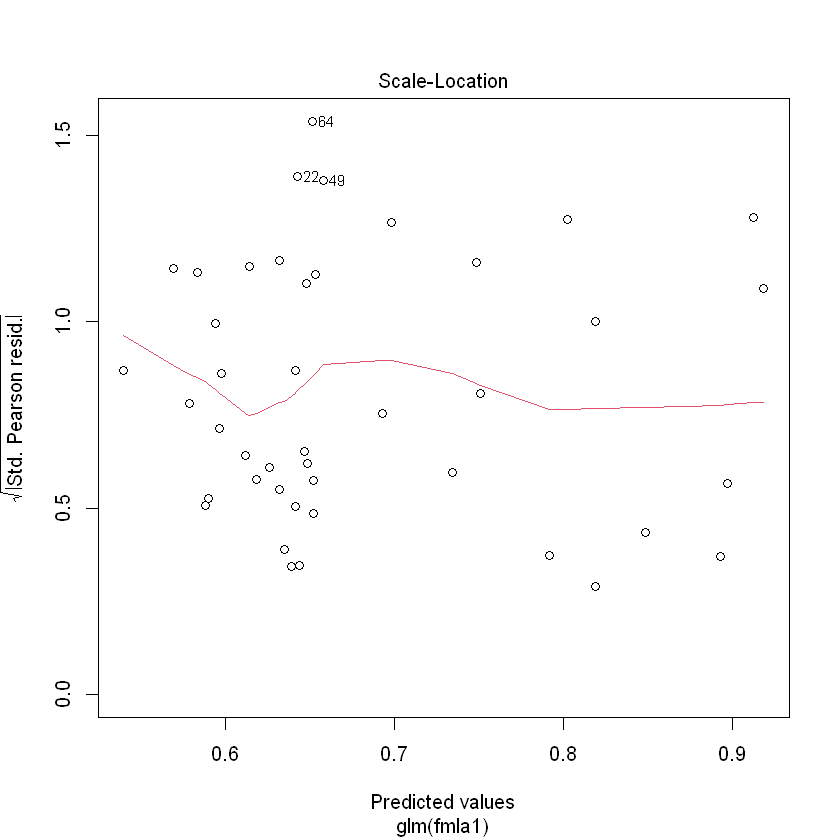

[1] 0.001

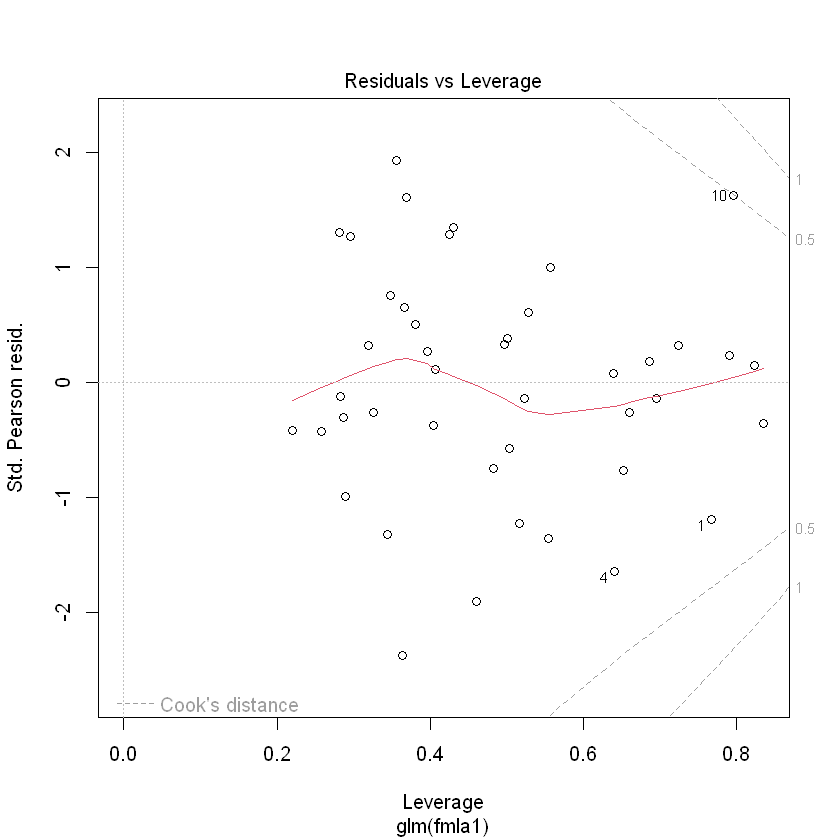

In [23]:
m1.gau.id.def <- glm(fmla1, data=dat)
summary(m1.gau.id.def)
myGOFglm(m1.gau.id.def)

In [25]:
m10.gau.id.def <- update(m1.gau.id.def, . ~ . + 0) # as.formula(". ~ . + 0")) to model without intercept.
summary(m10.gau.id.def)


Call:
glm(formula = pScore ~ year + UGactualStudents + PGactualStudents + 
    PhDpursuing + FROsalaries + FROmtce + FROseminars + SRprojects + 
    SRagencies + SRamount + Cprojects + Corgs + Camount + faculty + 
    category + UGPGPhD + propPGPhD + propPhD + FROcost + SRCrevenue + 
    SRCrevPerFaculty - 1, data = dat)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.059557  -0.012109   0.001587   0.012946   0.048870  

Coefficients: (3 not defined because of singularities)
                   Estimate Std. Error t value Pr(>|t|)    
year2021          6.469e-01  7.703e-02   8.398 2.61e-08 ***
year2022          6.540e-01  7.520e-02   8.697 1.43e-08 ***
UGactualStudents -9.110e-06  7.838e-06  -1.162   0.2576    
PGactualStudents  1.425e-05  2.092e-05   0.681   0.5028    
PhDpursuing       3.913e-05  3.756e-05   1.042   0.3088    
FROsalaries       1.365e-04  3.084e-04   0.443   0.6624    
FROmtce           8.930e-05  1.610e-04   0.555   0.5847    
FROsem

In [26]:
# m1.gau.id.def.signif <- update(m1, . ~ . - UGactualStudents - PGactualStudents - FROsalaries - FROmtce - FROseminars
#                 - SRprojects - SRagencies - Camount - UGPGPhD - propPGPhD - FROcost - SRCrevenue)
#   # as per the robust sandwich covar-matrix estimator, drop variables that are not significant from the model.
# myGOFglm(m1.gau.id.def.signif)

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"


[1] "Inference with this robust sandwich covar-matrix estimator while using Poisson means (and underestimated var)."

z test of coefficients:

                    Estimate  Std. Error z value Pr(>|z|)    
(Intercept)       4.0590e-01  2.4496e-01  1.6570 0.097519 .  
year2022          1.9190e-02  2.8324e-02  0.6775 0.498073    
UGactualStudents -3.4282e-05  2.4107e-05 -1.4221 0.154999    
PGactualStudents  6.2632e-05  6.7830e-05  0.9234 0.355820    
PhDpursuing       1.7126e-05  1.3104e-04  0.1307 0.896022    
FROsalaries       9.6193e-04  1.0470e-03  0.9188 0.358206    
FROmtce           8.7821e-04  4.8497e-04  1.8109 0.070162 .  
FROseminars      -2.4355e-02  1.4567e-02 -1.6719 0.094543 .  
SRprojects       -5.6550e-04  2.3132e-04 -2.4446 0.014501 *  
SRagencies        3.1057e-03  1.8209e-03  1.7056 0.088079 .  
SRamount          3.3897e-04  1.3602e-03  0.2492 0.803198    
Cprojects        -5.5519e-04  1.5630e-04 -3.5522 0.000382 ***
Corgs             8.7278e-04  2.7021e-04  3.2300 0.

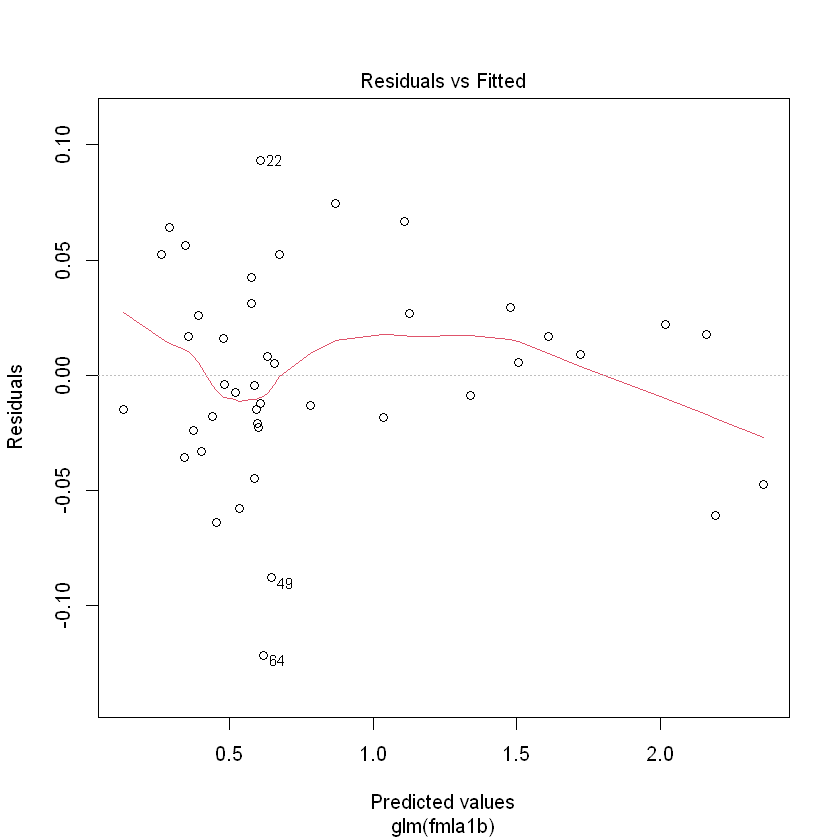

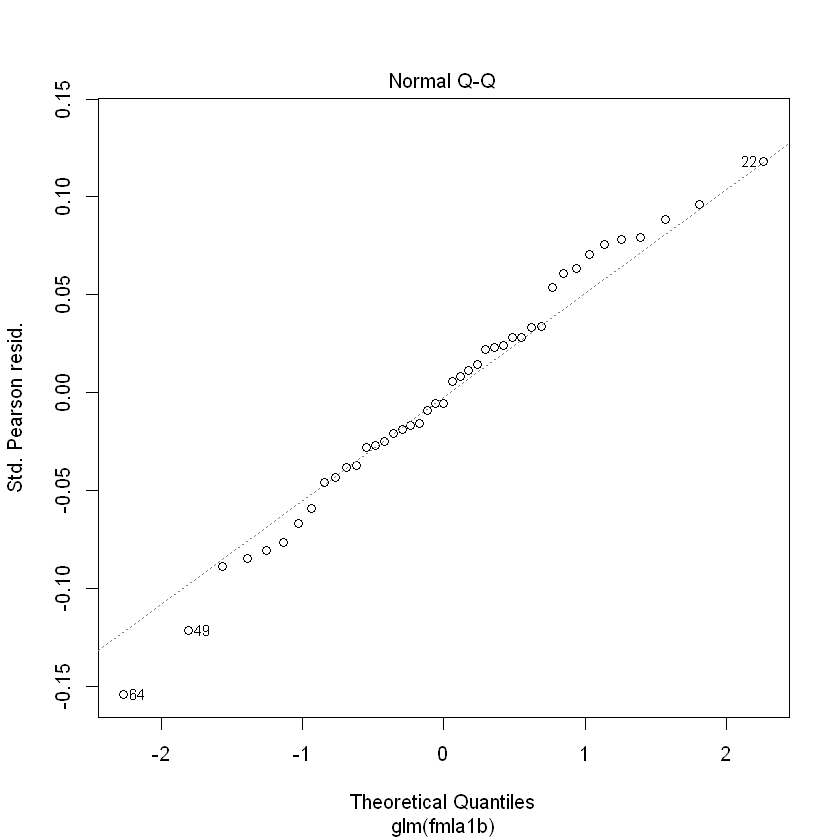

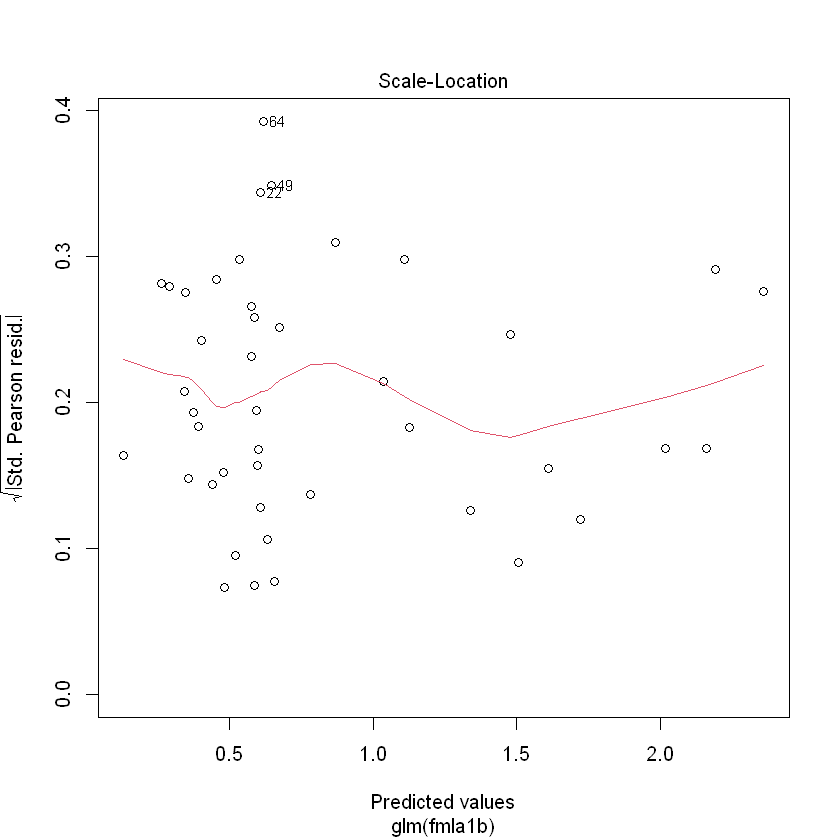

[1] 0.004

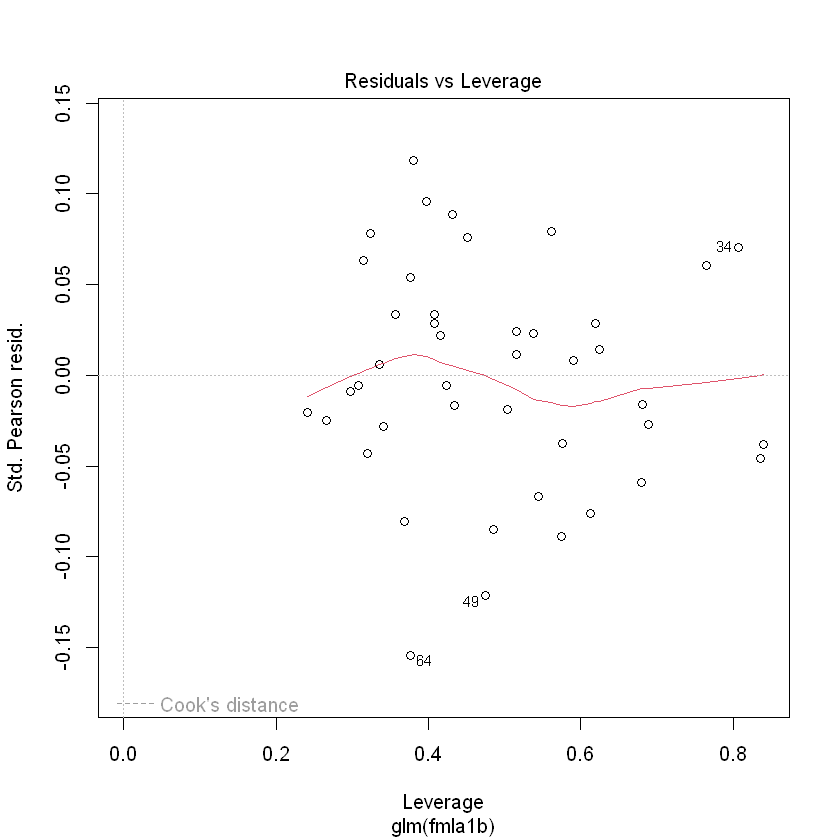

In [27]:
# fmla1b <- update(fmla1, paste("pScore", "~ ."))
m1.bin.logit.def <- glm(fmla1b,
           family=binomial(link="logit"), # weights=wtOffsetVec,
           data=dat)
  # > Warning message ... "non-integer #successes in a binomial glm!"
  # refer https://stackoverflow.com/questions/12953045/warning-non-integer-successes-in-a-binomial-glm-survey-packages.
myGOFglm(m1.bin.logit.def)

[1] "Inference with this robust sandwich covar-matrix estimator while using Poisson means (and underestimated var)."

z test of coefficients:

                    Estimate  Std. Error z value  Pr(>|z|)    
(Intercept)       1.5011e+00  1.2398e-01 12.1077 < 2.2e-16 ***
year2022         -2.8652e-02  1.9608e-02 -1.4612  0.143949    
UGactualStudents  2.5749e-05  1.4158e-05  1.8187  0.068953 .  
PGactualStudents -3.3588e-05  3.5980e-05 -0.9335  0.350548    
PhDpursuing      -1.4820e-04  6.6778e-05 -2.2194  0.026463 *  
FROsalaries      -9.6520e-05  4.7611e-04 -0.2027  0.839349    
FROmtce          -1.2774e-04  2.0451e-04 -0.6246  0.532205    
FROseminars      -3.9847e-03  6.0801e-03 -0.6554  0.512231    
SRprojects        2.3628e-04  1.4747e-04  1.6022  0.109113    
SRagencies       -9.9608e-04  9.1343e-04 -1.0905  0.275501    
SRamount          1.7217e-03  6.6677e-04  2.5822  0.009817 ** 
Cprojects         3.0272e-04  7.1935e-05  4.2082 2.574e-05 ***
Corgs            -4.6929e-04  1.4635e-

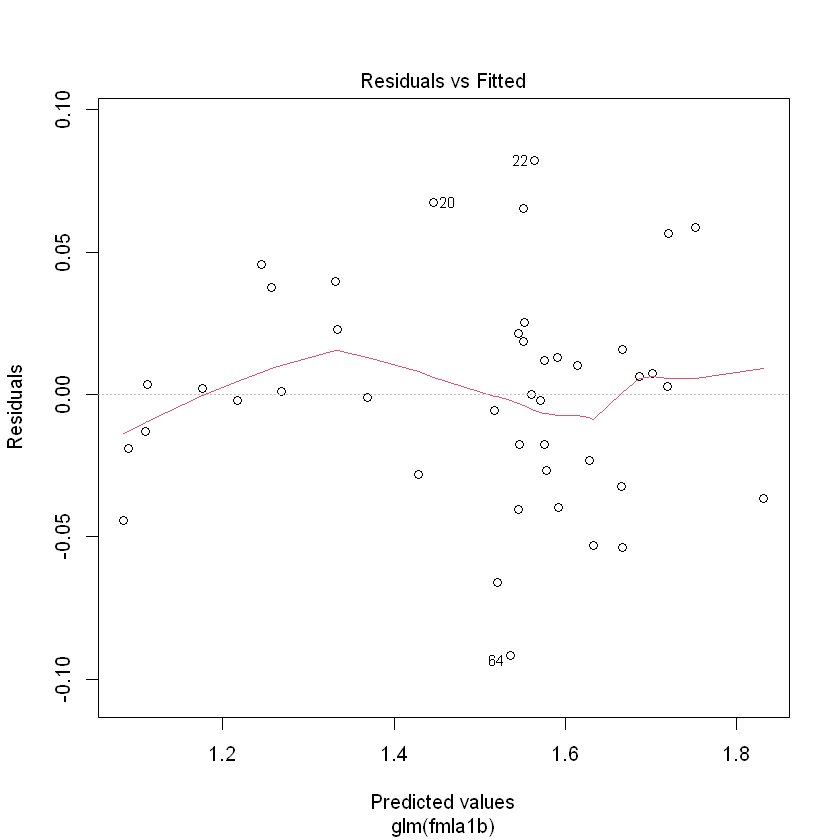

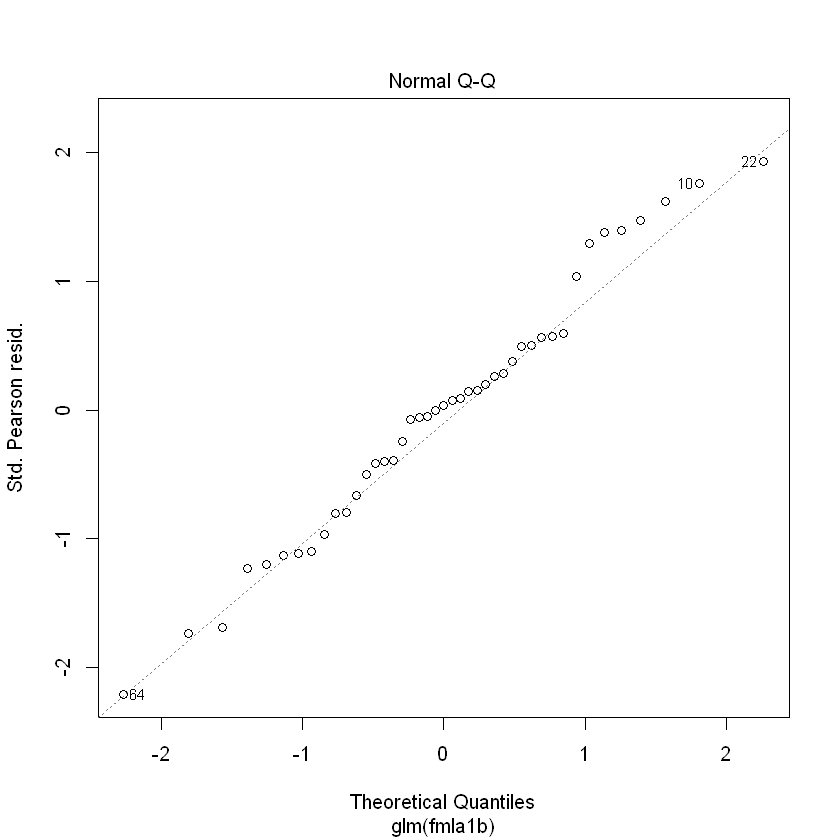

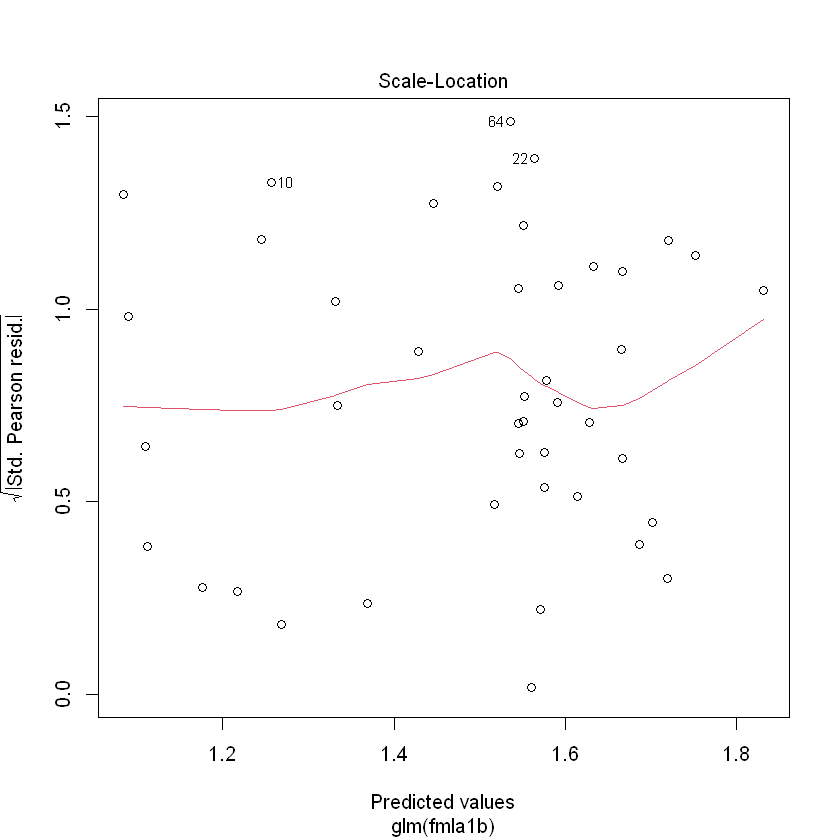

[1] 0.003

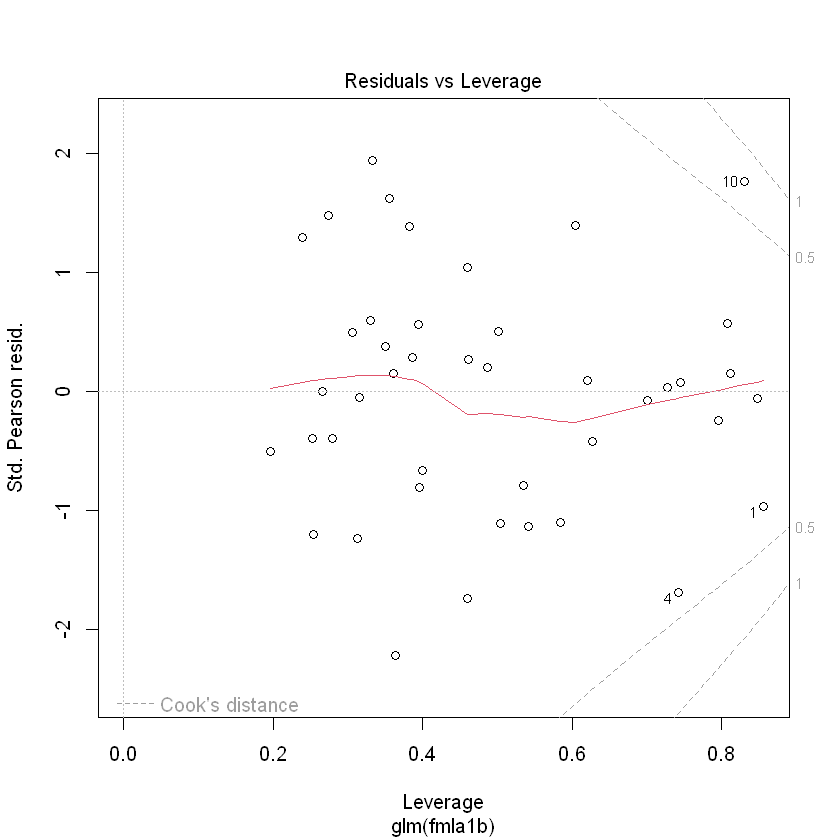

In [28]:
# Skipped Poisson regression.
m1.gam.inv.def <- glm(fmla1b,
           family=Gamma(link="inverse"), # weights=wtOffsetVec,
           data=dat); myGOFglm(m1.gam.inv.def)

[1] "Inference with this robust sandwich covar-matrix estimator while using Poisson means (and underestimated var)."

z test of coefficients:

                    Estimate  Std. Error z value  Pr(>|z|)    
(Intercept)       6.1584e-01  5.7925e-02 10.6316 < 2.2e-16 ***
year2022          8.9157e-03  7.1492e-03  1.2471  0.212364    
UGactualStudents -9.5667e-06  5.4193e-06 -1.7653  0.077509 .  
PGactualStudents  1.8116e-05  1.5965e-05  1.1348  0.256472    
PhDpursuing       2.2988e-05  3.0102e-05  0.7637  0.445066    
FROsalaries       1.2718e-04  2.4587e-04  0.5173  0.604961    
FROmtce           1.5940e-04  1.1920e-04  1.3373  0.181128    
FROseminars      -3.6195e-03  3.3149e-03 -1.0919  0.274882    
SRprojects       -1.2468e-04  5.8693e-05 -2.1242  0.033650 *  
SRagencies        6.4489e-04  4.2646e-04  1.5122  0.130485    
SRamount         -1.9688e-04  3.2229e-04 -0.6109  0.541285    
Cprojects        -1.1872e-04  3.3363e-05 -3.5585  0.000373 ***
Corgs             1.8619e-04  5.8640e-

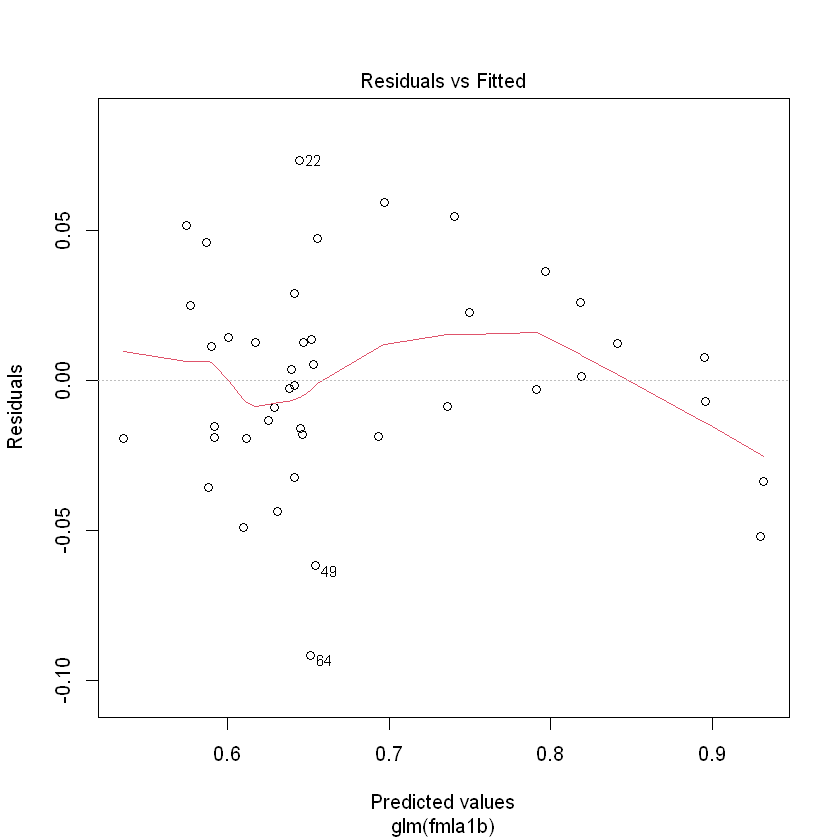

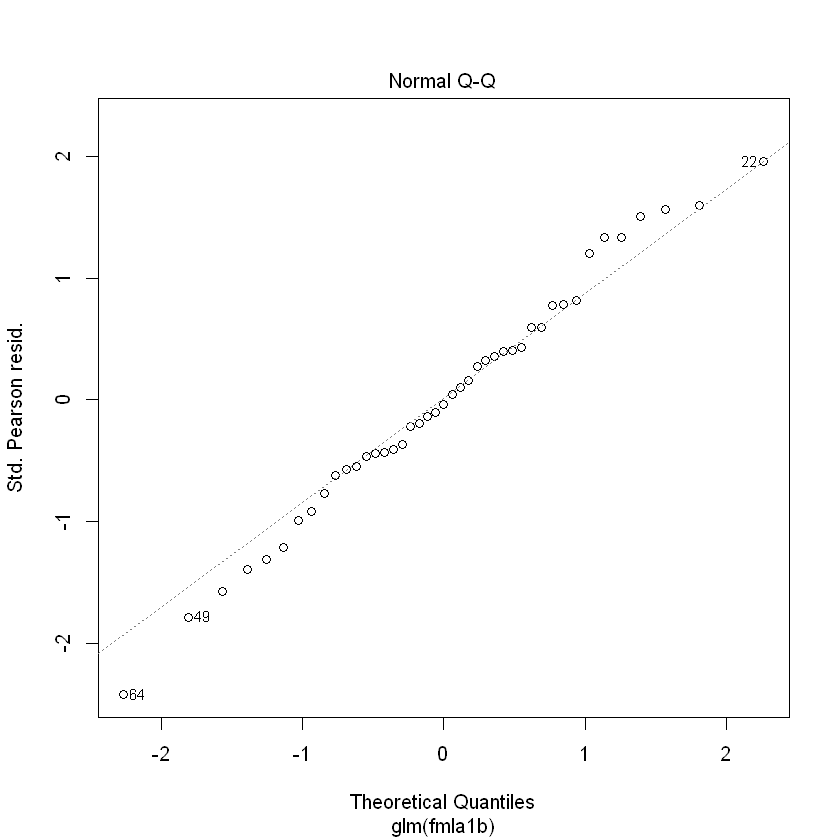

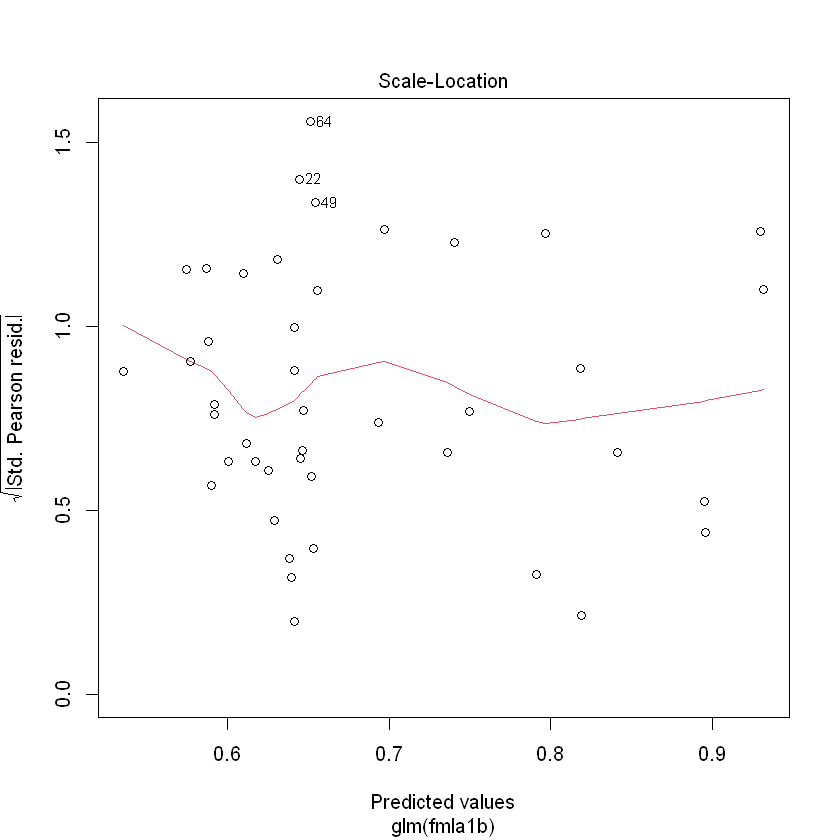

[1] 0.002

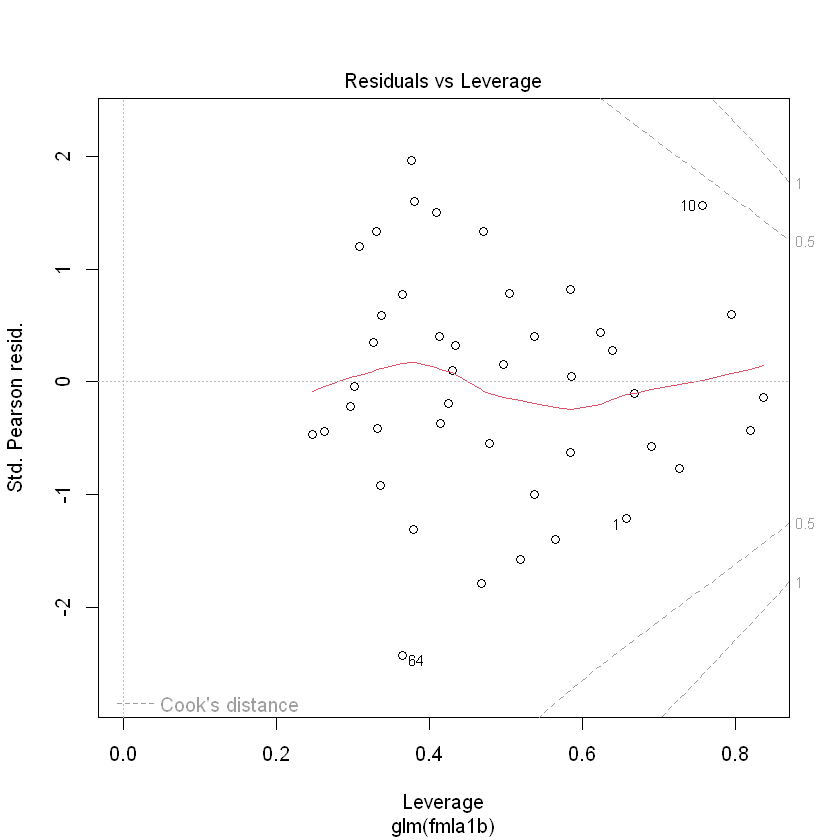

In [29]:
m1.gam.id <- glm(fmla1b,
           family=Gamma(link="identity"), # weights=wtOffsetVec,
            data=dat); myGOFglm(m1.gam.id)

[1] "Inference with this robust sandwich covar-matrix estimator while using Poisson means (and underestimated var)."

z test of coefficients:

                    Estimate  Std. Error z value  Pr(>|z|)    
(Intercept)      -4.4379e-01  8.6657e-02 -5.1212 3.036e-07 ***
year2022          1.5635e-02  1.2116e-02  1.2905  0.196872    
UGactualStudents -1.5794e-05  8.6288e-06 -1.8304  0.067192 .  
PGactualStudents  2.5589e-05  2.3888e-05  1.0712  0.284094    
PhDpursuing       6.6852e-05  4.5280e-05  1.4764  0.139834    
FROsalaries       1.5207e-04  3.4842e-04  0.4365  0.662509    
FROmtce           1.5055e-04  1.5897e-04  0.9471  0.343606    
FROseminars      -1.3106e-03  4.5683e-03 -0.2869  0.774204    
SRprojects       -1.7561e-04  9.5181e-05 -1.8450  0.065033 .  
SRagencies        8.3225e-04  6.3976e-04  1.3009  0.193300    
SRamount         -7.4771e-04  4.6911e-04 -1.5939  0.110958    
Cprojects        -1.8809e-04  4.8278e-05 -3.8960 9.780e-05 ***
Corgs             2.9107e-04  9.1452e-

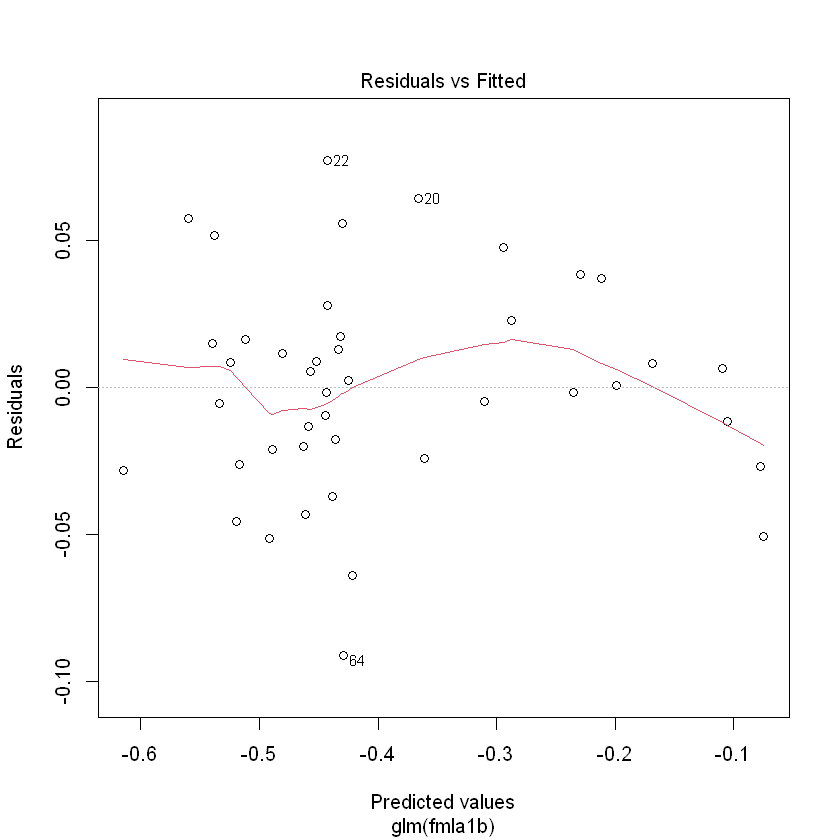

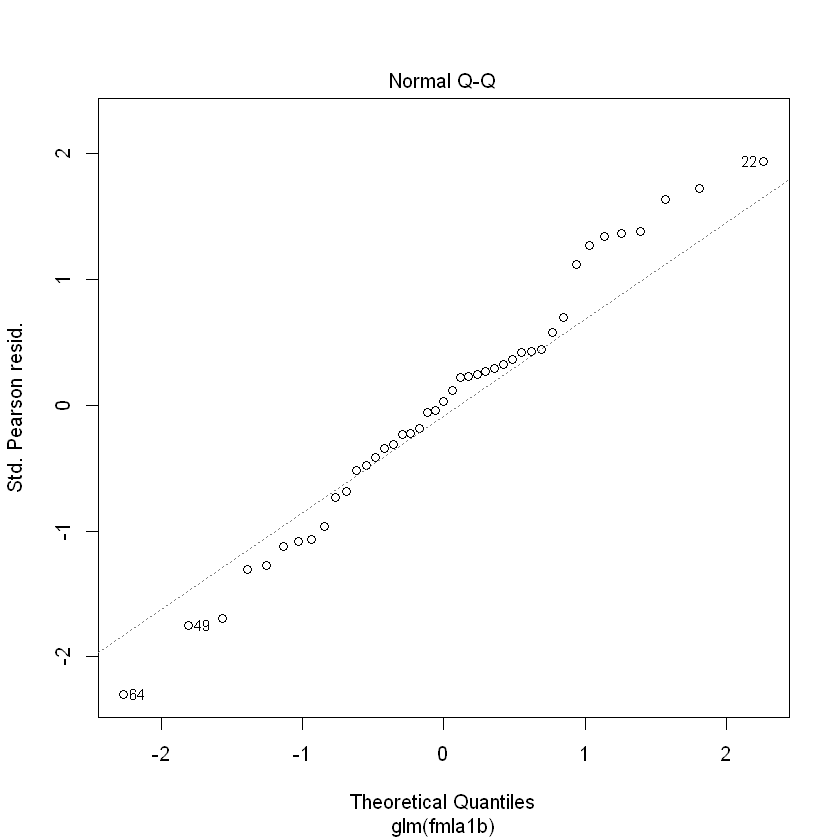

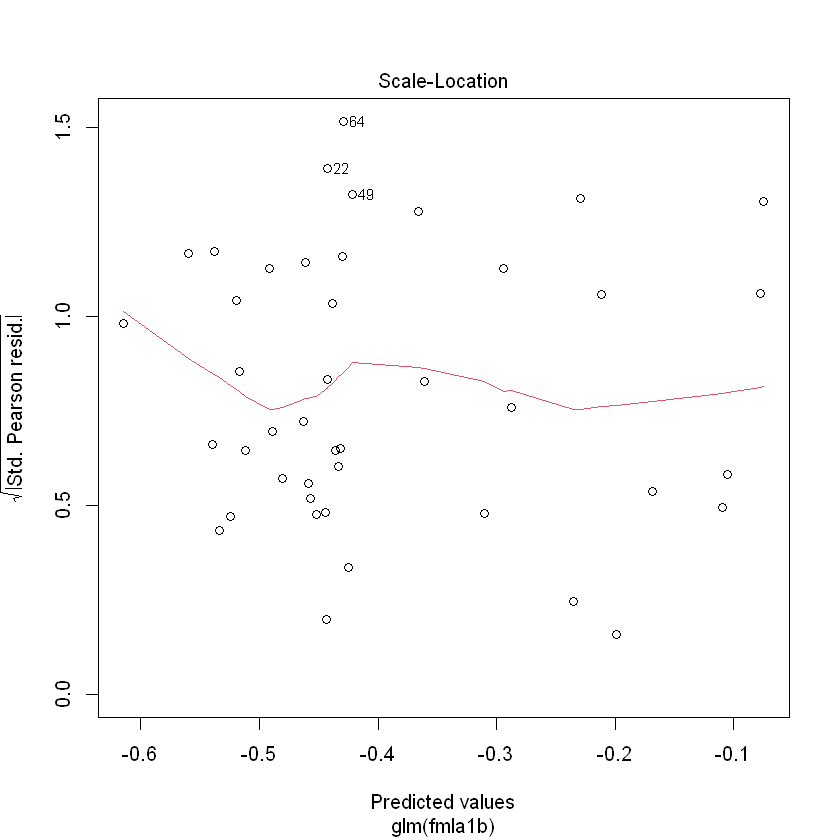

[1] 0.002

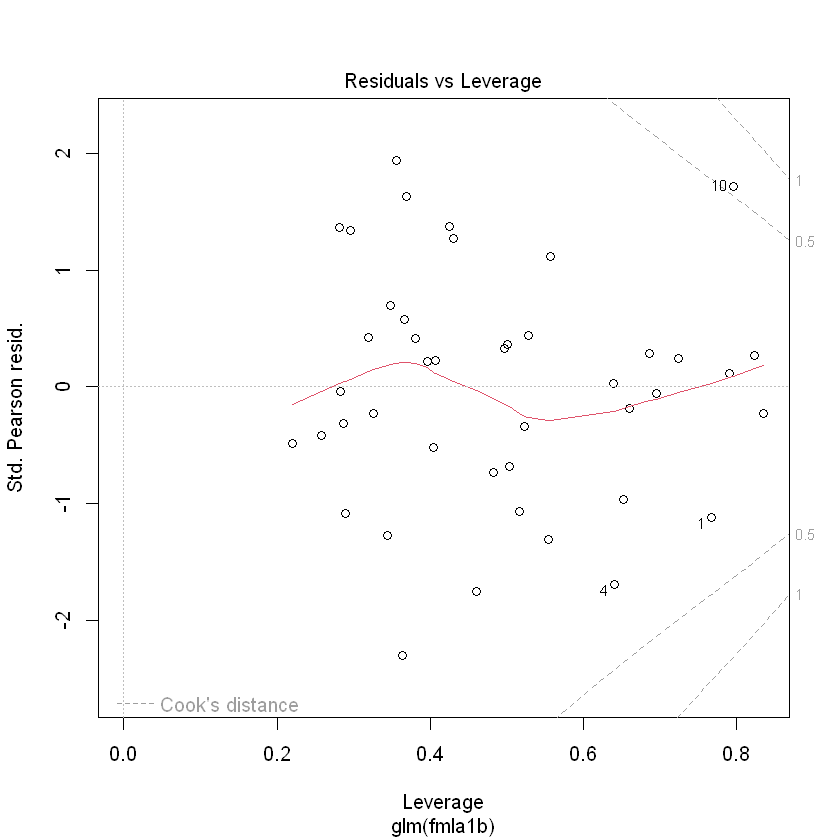

In [30]:
m1.gam.log <- glm(fmla1b,
           family=Gamma(link="log"), # weights=wtOffsetVec,
            data=dat); myGOFglm(m1.gam.log)

[1] "Inference with this robust sandwich covar-matrix estimator while using Poisson means (and underestimated var)."

z test of coefficients:

                    Estimate  Std. Error z value  Pr(>|z|)    
(Intercept)       2.1851e+00  3.7081e-01  5.8928 3.798e-09 ***
year2022         -1.0725e-01  6.2635e-02 -1.7123  0.086849 .  
UGactualStudents  8.4336e-05  4.5764e-05  1.8429  0.065350 .  
PGactualStudents -1.0230e-04  1.1139e-04 -0.9184  0.358399    
PhDpursuing      -5.2621e-04  2.0276e-04 -2.5952  0.009455 ** 
FROsalaries       6.0171e-05  1.3858e-03  0.0434  0.965366    
FROmtce          -3.1369e-04  5.8465e-04 -0.5365  0.591589    
FROseminars      -2.2084e-02  1.7927e-02 -1.2319  0.217994    
SRprojects        6.8127e-04  4.6002e-04  1.4810  0.138618    
SRagencies       -2.7157e-03  2.6998e-03 -1.0059  0.314470    
SRamount          6.3417e-03  2.0107e-03  3.1539  0.001611 ** 
Cprojects         9.5132e-04  2.2334e-04  4.2595 2.049e-05 ***
Corgs            -1.4797e-03  4.6084e-

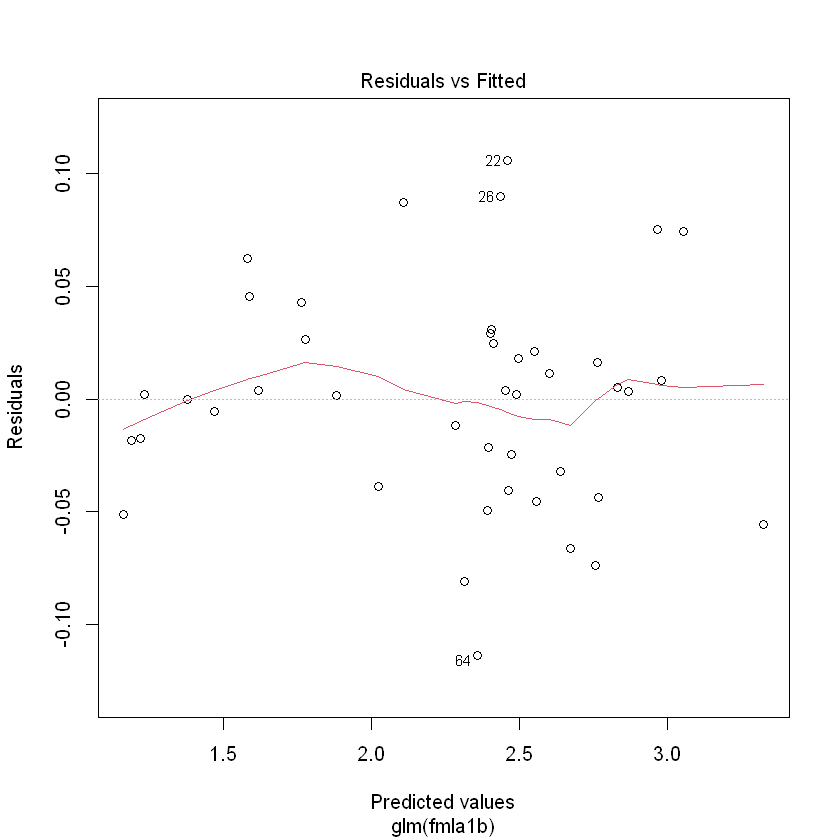

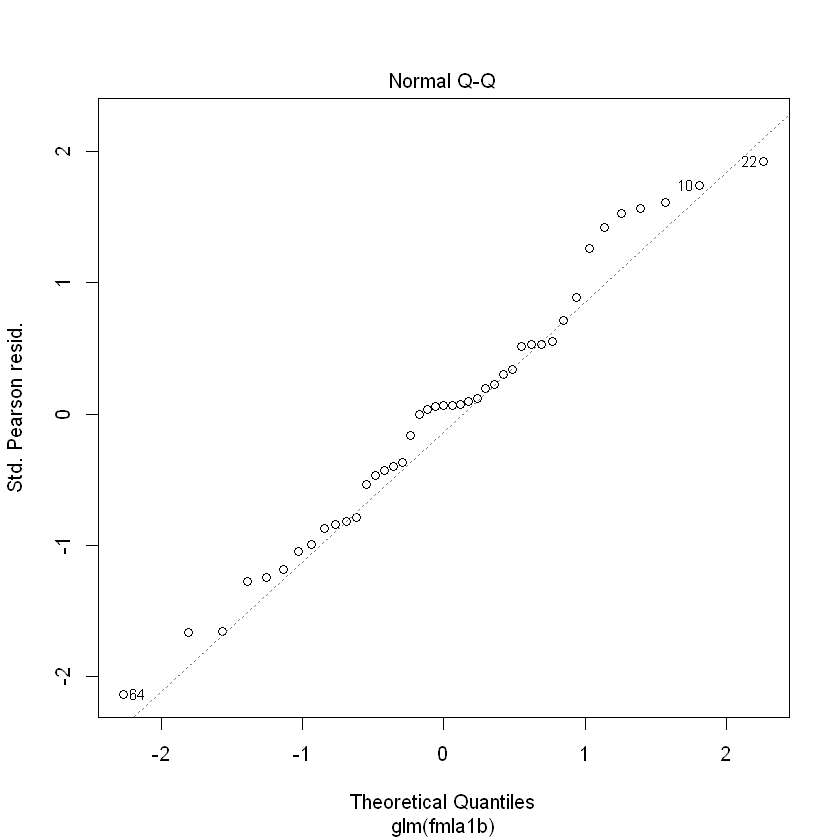

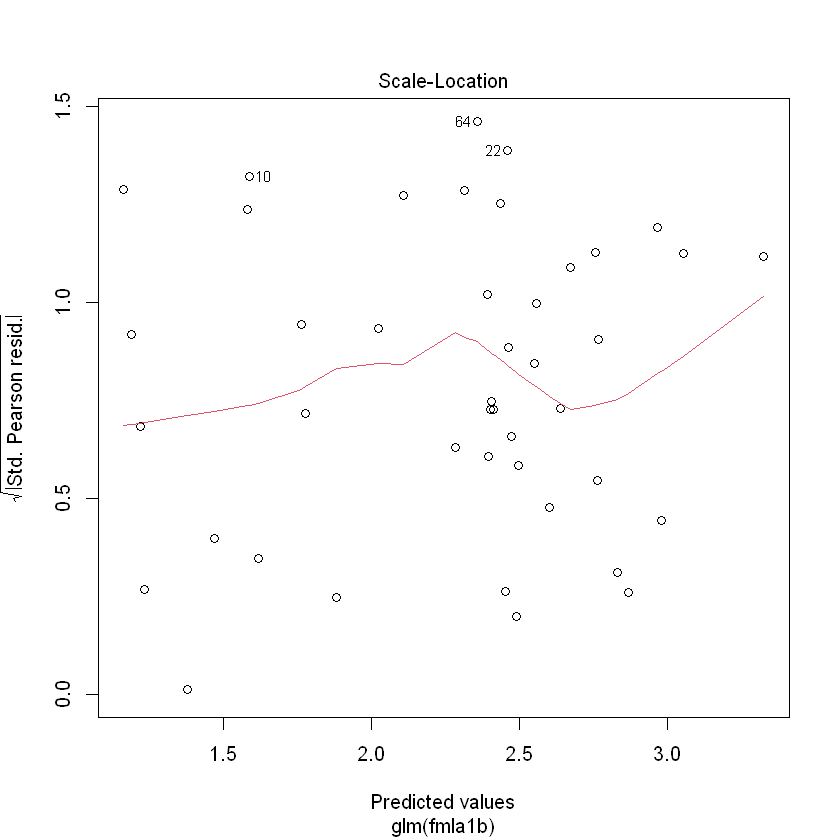

[1] 0.004

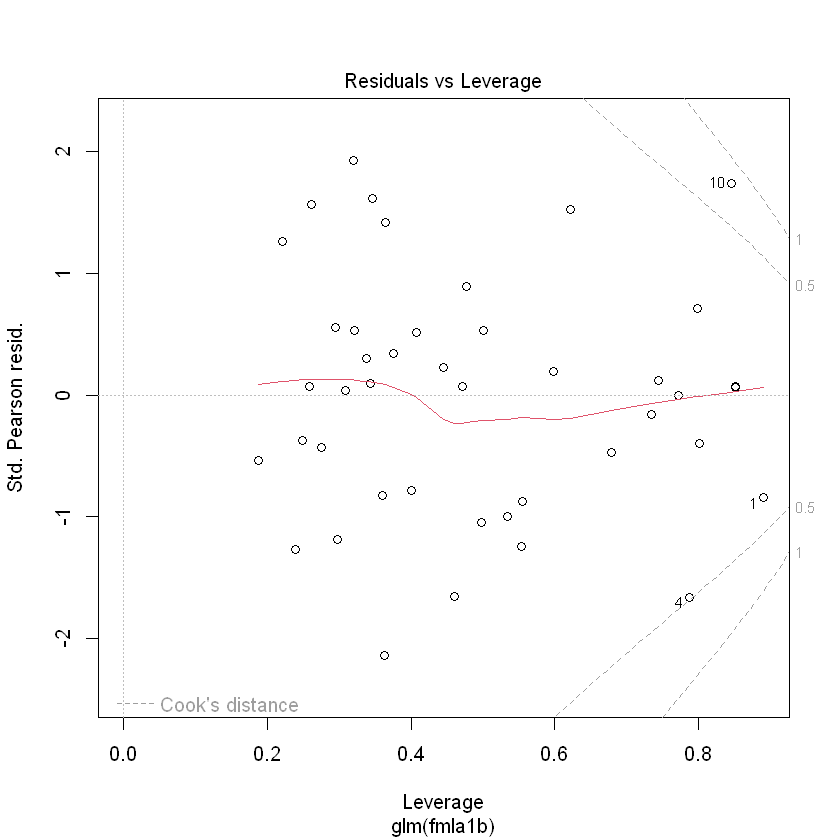

In [31]:
m1.invgau.invmu2.def <- glm(fmla1b,
           family=inverse.gaussian(), # link="1/mu^2" by default, weights=wtOffsetVec,
           data=dat); myGOFglm(m1.invgau.invmu2.def)

[1] "Inference with this robust sandwich covar-matrix estimator while using Poisson means (and underestimated var)."

z test of coefficients:

                    Estimate  Std. Error z value  Pr(>|z|)    
(Intercept)       5.9749e-01  5.8511e-02 10.2115 < 2.2e-16 ***
year2022          1.0017e-02  6.9528e-03  1.4408 0.1496511    
UGactualStudents -9.8890e-06  5.4385e-06 -1.8183 0.0690122 .  
PGactualStudents  1.9388e-05  1.6147e-05  1.2008 0.2298466    
PhDpursuing       1.4621e-05  3.0315e-05  0.4823 0.6295858    
FROsalaries       1.1610e-04  2.5770e-04  0.4505 0.6523430    
FROmtce           2.0382e-04  1.2767e-04  1.5965 0.1103882    
FROseminars      -4.7013e-03  3.4457e-03 -1.3644 0.1724486    
SRprojects       -1.3045e-04  5.7186e-05 -2.2811 0.0225437 *  
SRagencies        7.0416e-04  4.2627e-04  1.6519 0.0985514 .  
SRamount         -1.0471e-04  3.2885e-04 -0.3184 0.7501672    
Cprojects        -1.1466e-04  3.4354e-05 -3.3376 0.0008449 ***
Corgs             1.8202e-04  5.8259e-

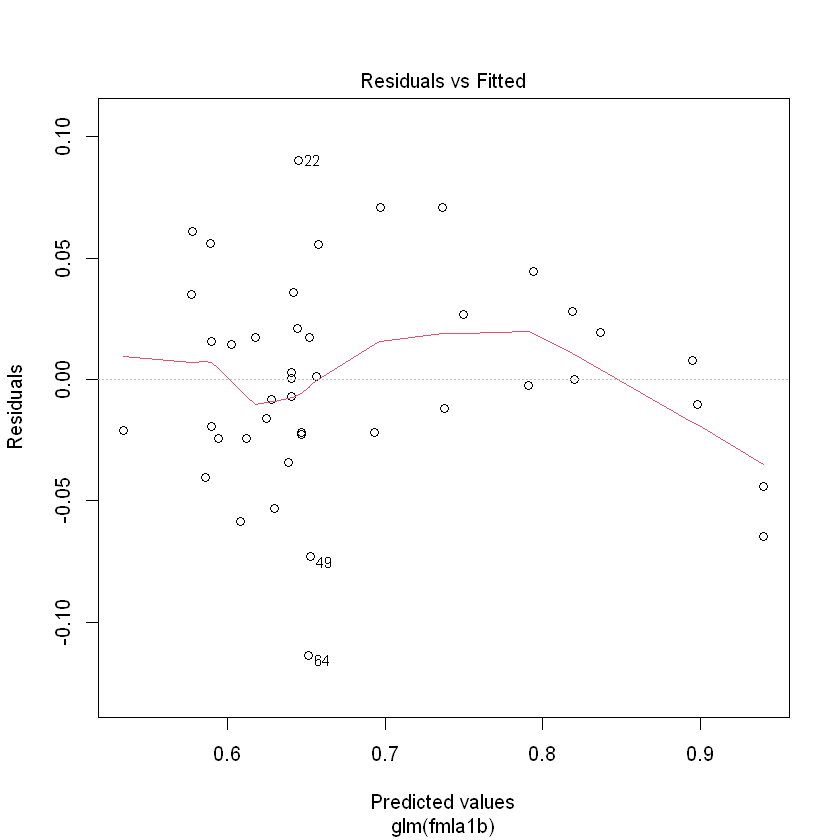

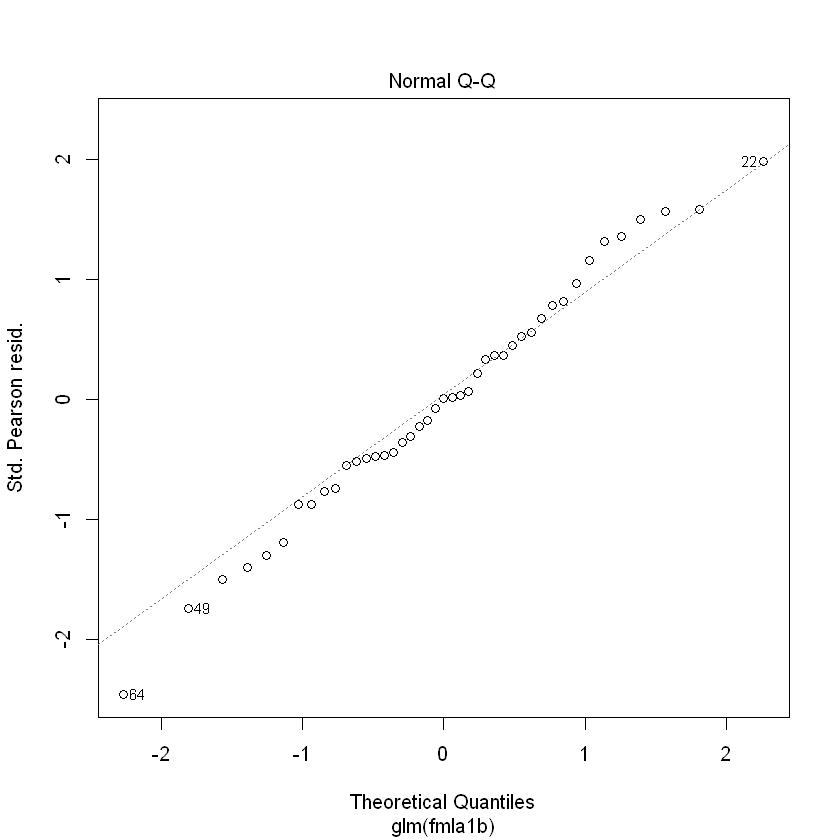

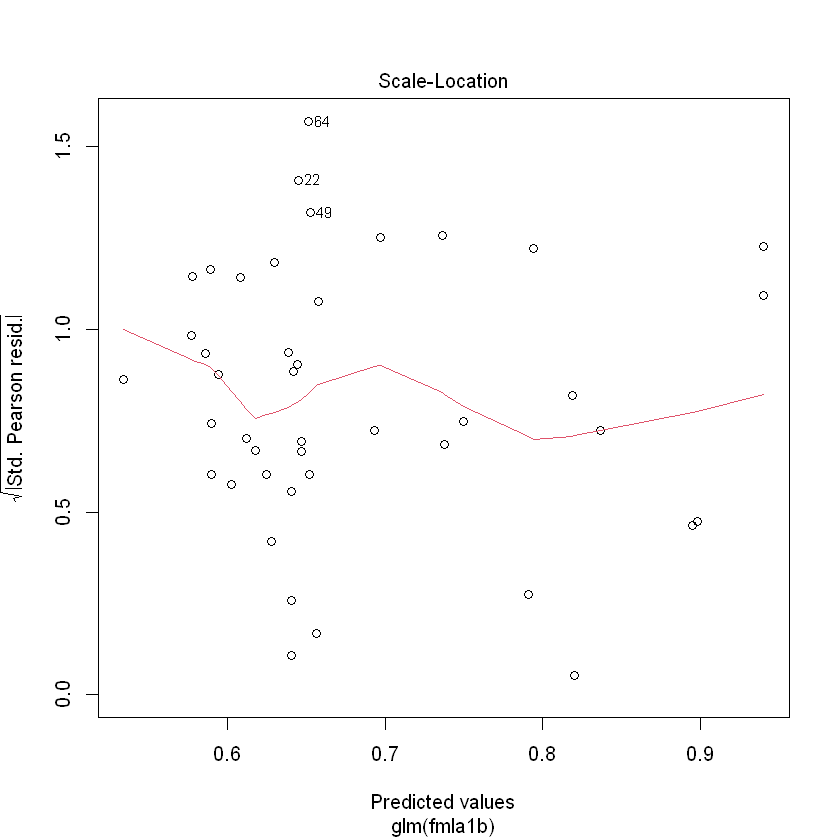

[1] 0.003

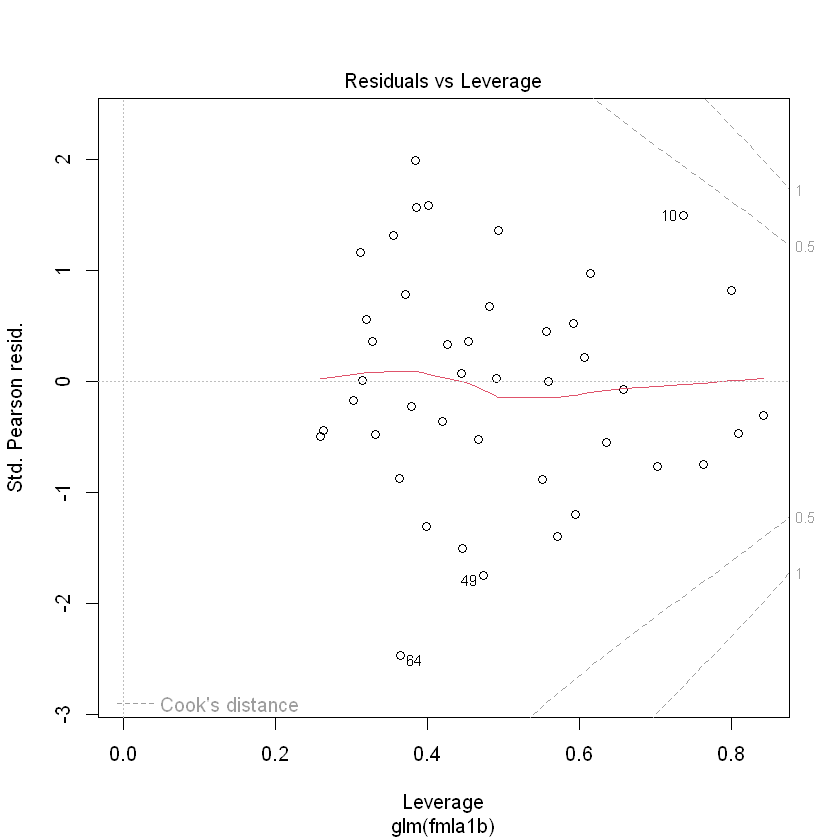

In [32]:
m1.invgau.id <- glm(fmla1b,
           family=inverse.gaussian(link="identity"), # weights=wtOffsetVec,
           data=dat); myGOFglm(m1.invgau.id)

In [33]:
# Excluding "faculty" data:
# m1 .7549RD.0501 AIC244 okRvsQ, m1.signif .75RD.05 AC-257,
# m1b 3.8RD.19 AIC92 okRvsQ, m1gi 1.5RD.14 AIC226 flatRvsL,
# m1gl 1.5RD.12 AIC235 nokRvsL, m1igi 2.2RD.17 AIC240 cutRvsL.